# ABSTRACT
El dataset elegido proviene de **Kaggle**, que a su vez está conformado por información reunida de diversas fuentes (según la descripción del autor). Fuente: https://www.kaggle.com/datasets/jpmiller/police-violence-in-the-us

Se trata de datos respecto de **violencia policial en diferentes estados de los Estados Unidos entre los años 2000 y 2020** y cuenta con datos de las víctimas, tales como **edad, etnia, género**, etcétera.

Nuestro objetivo es crear un modelo que permita **predecir la cantidad de homicidios perpetrados por la policía** en aquellos estados con una **tasa de crímenes policiales por encima de la media**. Nos enfocamos además en **víctimas cuyo género es masculino, entre las edades de 22 y 38 años, y las etnias comprendidas en nuestro análisis son la negra/afroamericana, blanca/europea y latina**; dado que son las etnias más atacadas.

Según Wikipedia: *"En los Estados Unidos, la raza y la brutalidad policial siguen estando estrechamente vinculados, y el fenómeno ha provocado una serie de disturbios raciales en los últimos años. Especialmente notable entre estos incidentes fue el levantamiento causado por la detención y los golpes a Rodney King el 3 de marzo de 1991 por agentes del Departamento de Policía de Los Ángeles. El ambiente fue particularmente volátil debido a que el hecho había sido filmado por un espectador y ampliamente difundida después. El hecho de que los cuatro agentes de policía acusados de asalto y otros cargos fueron absueltos, provocó que estallaran los Disturbios de Los Ángeles en 1992. Un extenso informe preparado para el Consejo de Derechos Humanos de las Naciones Unidas, presentado en 2006 afirma que en Estados Unidos, la Guerra contra el Terrorismo ha creado un clima generalizado de impunidad hacia los agentes del orden público, y ha contribuido a la erosión de lo que pocos mecanismos que existían para el control civil sobre las fuerzas del orden. Como resultado, la brutalidad policial y los abusos han persistido sin cesar e impertérrita en todo el país."*. Fuente: https://es.wikipedia.org/wiki/Brutalidad_policial

### Motivación:
Nuestra motivación es **hacer una diferencia en esta problemática** que lleva mucho tiempo y afecta a toda la sociedad estadounidense.  

### Audiencia
En general, **toda la sociedad norteamericana** para conocer cómo puede ir evolucionando la situación. 

Si bien es una problemática conocida, queremos ir más allá para tener datos concretos y que se conozca en profundidad esta realidad, y no quedar en la mera percepción de lo que se conoce a través de los medios (o, en el peor de los casos, la ignorancia al respecto). En un nivel más específico, apuntamos a **los responsables de políticas sociales**, para que puedan tomar estos datos y **generar acciones concretas** que ayuden a disminuir la violencia (por ejemplo, a través de capacitaciones a las fuerzas policiales)

## OBJETIVO
Somos **embajadoras de la ONU**, especialistas en problemáticas sociales. Vemos que los acontecimientos de violencia policial en los Estados Unidos, si bien es un tema de larga data, ocasionaron el **cambio de rumbo político** a través de protestas de la población tras el asesinato de George Floyd y la popularización del movimiento **Black Lives Matter**. 

Nos interesa conocer **cómo se distribuyen los crímenes policiales en los diferentes estados** y cuáles son aquellas **etnias más afectadas** en cada uno de ellos.

## CONTEXTO SOCIAL

La brutalidad policial es **una de las violaciones de los derechos humanos más grave, perdurable y controversial** de Estados Unidos. El problema existe a nivel nacional y **está institucionalizado**. Por estos motivos, el gobierno federal estadounidense (así como los gobiernos estatales y municipales, que tienen la obligación de respetar las normas internacionales en materia de derechos humanos a las que está obligado Estados Unidos) merece **rendir cuentas ante los organismos internacionales de derechos humanos y la opinión pública internacional**.

En ciudades de todo Estados Unidos, **los agentes de policía participan en tiroteos injustificados, palizas graves, ahogamientos fatales y tratamientos físicos innecesariamente duros**; mientras que sus superiores, los funcionarios municipales y el Departamento de Justicia **no actúan con decisión para contener o penalizar dichos actos** o ni siquiera para **tener constancia de la magnitud del problema**. Habitualmente, los agentes violentos (que suelen ser un pequeño porcentaje de los agentes de un cuerpo de policía) pueden ser **objeto de denuncias reiteradas**, pero sus compañeros y la mala calidad de las investigaciones policiales internas **suelen protegerles**. Una víctima que busca resarcimiento **se enfrenta a barreras en cada etapa del proceso**, obstáculos que van de la **intimidación abierta a la reticencia de los fiscales locales y federales a asumir los casos de brutalidad policial**. Los abusos graves perduran debido a que los considerables obstáculos al establecimiento de la responsabilidad hacen muy posible que los agentes que cometen violaciones de los derechos humanos **eludan el debido castigo y continúen su conducta abusiva**.

Fuente: Human Rights Watch: https://www.hrw.org/legacy/spanish/informes/1998/eeuu_policia.html

## PROBLEMA
Queremos entender con **datos estadísticos** esta problemática, buscando una mirada más **objetiva y tangible**, apartándonos de las noticias y de lo anecdótico.

## CONTEXTO ANALÍTICO
Nuestro análisis apunta a **evaluar qué etnias y edades serán más afectadas**. Buscamos **profundizar en la etnia afroamericana** para conocer cuáles grupos etarios son las principales víctimas de la violencia policial.

## INTERROGANTES
1. ¿**Cómo se distribuyen las etnias** entre las víctimas de violencia policial en el dataset analizado?
2. ¿**Cuáles son los rangos de edad** más vulnerables a la violencia policial según la etnia?
3. ¿Qué **estados** tienen mayor cantidad de casos de violencia policial?

## HIPÓTESIS
Consideramos que, en una generalidad, la etnia más vulnerable a los ataques policiales es la **comunidad afroamericana**.

También creemos que en cada estado va a haber una diferencia en cuanto al resto de las etnias víctimas de violencia policial. 

Estimamos que los estados más violentos son los que se encuentran **al sur del país** debido a la cantidad de inmigrantes y la **historia de racismo** en esa región.

In [527]:
# Importamos librerías

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor  
import math
import sklearn.metrics as metrics

In [528]:
# Importamos nuestro dataset

df_encounters= pd.read_csv('fatal_encounters_dot_org.csv')

In [529]:
# Completamos los NA de age con la media

df_encounters["Subject's age"] = df_encounters["Subject's age"].fillna(df_encounters["Subject's age"].mean(skipna=True))

In [530]:
# Redondeamos los valores de age que completamos con la media

df_encounters["Subject's age"] = round(df_encounters["Subject's age"], 0)

# VISUALIZACIONES

## Primera visualización
Histograma sobre la **etnia** de las víctimas

In [531]:
# Resumen numérico

resumen1 = df_encounters.value_counts(df_encounters["Subject's race"])
resumen1

Subject's race
European-American/White    9246
Race unspecified           8833
African-American/Black     6087
Hispanic/Latino            3685
Asian/Pacific Islander      433
Native American/Alaskan     283
Middle Eastern               49
dtype: int64

In [532]:
resumen2 = df_encounters["Subject's race"].count()
resumen2 

28616

In [533]:
resumen3 = (resumen1 / resumen2) * 100
resumen3

Subject's race
European-American/White    32.310595
Race unspecified           30.867347
African-American/Black     21.271317
Hispanic/Latino            12.877411
Asian/Pacific Islander      1.513140
Native American/Alaskan     0.988957
Middle Eastern              0.171233
dtype: float64

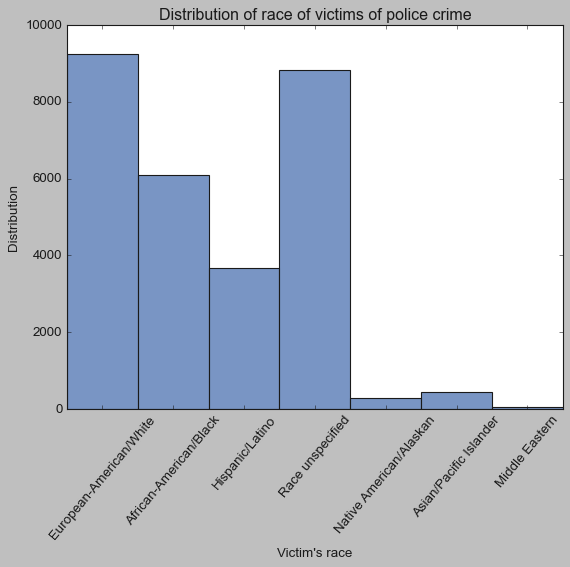

In [534]:
# Gráfico

import seaborn as sns
sns.histplot(data=df_encounters, x=df_encounters["Subject's race"])
plt.xlabel("Victim's race")
plt.ylabel("Distribution")
plt.title("Distribution of race of victims of police crime")
plt.xticks(rotation=50)
sns.set(rc = {'figure.figsize':(10,8)})

## Interpretación
A pesar de que nuestra hipótesis inicial es que la etnia afroamericana es la más atacada, el gráfico indica que **son los blancos la mayoría de las víctimas**. Sin embargo, un **30% de los casos** de este dataset tienen la **etnia sin especificar**, con lo cual no podemos decir que es concluyente que los blancos son los más atacados.

## Segunda visualización
Histograma sobre **grupos etarios más vulnerables** según etnia

In [535]:
# Resumen numérico

resumen4 = df_encounters.value_counts(df_encounters["Subject's age"])
resumen4

Subject's age
35.0     1727
22.0      920
25.0      897
24.0      864
27.0      850
         ... 
93.0        1
95.0        1
97.0        1
101.0       1
107.0       1
Length: 98, dtype: int64

In [536]:
df_encounters["Subject's age"].describe()

count    28617.000000
mean        35.160289
std         13.552069
min          0.000000
25%         25.000000
50%         34.000000
75%         43.000000
max        107.000000
Name: Subject's age, dtype: float64

Text(0.5, 1.0, 'Distribution of victims by Age and Race')

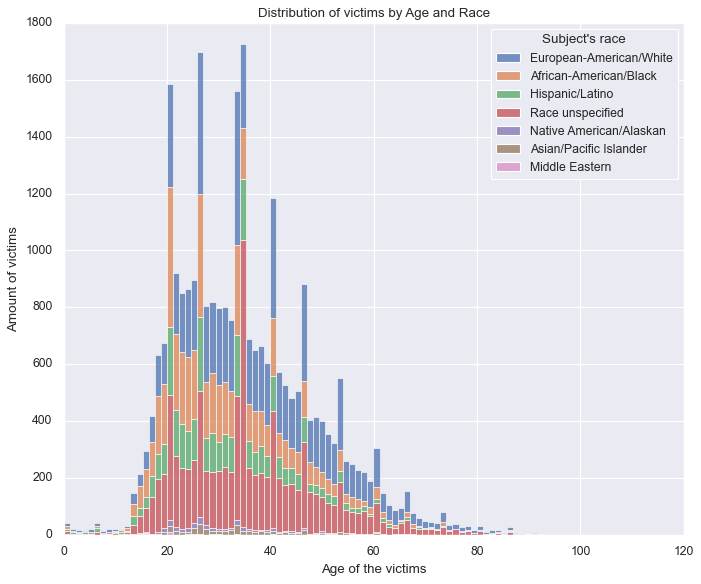

In [537]:
# Gráfico

import seaborn as sns
sns.histplot(data=df_encounters, x=df_encounters["Subject's age"], hue=df_encounters["Subject's race"], multiple="stack")
plt.xlabel("Age of the victims")
plt.ylabel("Amount of victims")
plt.title("Distribution of victims by Age and Race")

## Interpretación
Podemos ver que la **media es de 35 años**, el primer cuartil está en torno a los 25 años, y el máximo es de 107 años. 

In [538]:
# Filtramos por etnia African-American/Black

resumen5 = df_encounters[df_encounters["Subject's race"] == "African-American/Black"]
resumen5

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
1,25747.0,Mark A. Horton,21.0,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
2,25748.0,Phillip A. Blurbridge,19.0,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
4,1.0,LaTanya Janelle McCoy,24.0,Female,African-American/Black,African-American/Black,Not imputed,NaN,01/02/2000,5700 block Mack Road,...,LaTanya Janelle McCoy's car was struck from be...,Unknown,Pursuit,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000
6,25750.0,Billy Jones,30.0,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/02/2000,Pollock Street,...,Officer Charles Rowe began pursuing Billie Jon...,Unreported,Pursuit,https://docs.google.com/document/d/1G106pI2URB...,No,NaN,1/2/2000: Officer Charles Rowe began pursuing ...,NaN,25750.0,2000
7,25751.0,Terry Rouse,29.0,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/02/2000,Pollock Street,...,Officer Charles Rowe began pursuing Billie Jon...,Unreported,Pursuit,https://docs.google.com/document/d/1G106pI2URB...,No,NaN,1/2/2000: Officer Charles Rowe began pursuing ...,NaN,25751.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28586,28589.0,Coleman Lamar Sample,23.0,Male,African-American/Black,African-American/Black,Not imputed,https://fatalencounters.org/wp-content/uploads...,08/12/2020,6308 Blakely Square,...,"At around 10:23 p.m., a trooper reported that ...",Pending investigation,No,https://www.wtkr.com/news/chase-suspect-in-vir...,No,NaN,"8/12/2020: At around 10:23 p.m., a trooper rep...",NaN,28589.0,2020
28589,28592.0,Rafael Jevon Minniefield,29.0,Male,African-American/Black,African-American/Black,Not imputed,NaN,08/13/2020,3143 US-29,...,"About 12:04 a.m., an officer spotted a 2002 Do...",Pending investigation,Yes,https://www.ajc.com/news/suspected-dui-driver-...,Drug or alcohol use,NaN,"8/13/2020: About 12:04 a.m., an officer spotte...",NaN,28592.0,2020
28595,28598.0,Anthony McClain,32.0,Male,African-American/Black,African-American/Black,Not imputed,https://fatalencounters.org/wp-content/uploads...,08/15/2020,Raymond Avenue and Grandview Street,...,Officers pulled over a car which was occupied ...,Pending investigation,Intentional use of deadly force,https://www.pasadenanow.com/main/breaking-pers...,No,NaN,8/15/2020: Officers pulled over a car which wa...,NaN,28598.0,2020
28597,28600.0,Kendrell Antron Watkins,31.0,Male,African-American/Black,African-American/Black,Not imputed,NaN,08/15/2020,15th Street and Martin Luther King Jr. Boulevard,...,Tuscaloosa police officers used a Taser to sub...,Pending investigation,Yes,https://www.tuscaloosanews.com/news/20200815/t...,Yes,NaN,8/15/2020: Tuscaloosa police officers used a T...,NaN,28600.0,2020


In [539]:
# Generamos la tabla de Age

resumen6 = resumen5.value_counts(df_encounters["Subject's age"])
resumen6

Subject's age
22.0     268
21.0     260
24.0     260
23.0     254
25.0     244
        ... 
70.0       1
87.0       1
92.0       1
93.0       1
107.0      1
Length: 89, dtype: int64

In [540]:
# Describe de edades

resumen5["Subject's age"].describe()

count    6087.000000
mean       31.334483
std        12.328875
min         0.000000
25%        22.000000
50%        29.000000
75%        38.000000
max       107.000000
Name: Subject's age, dtype: float64

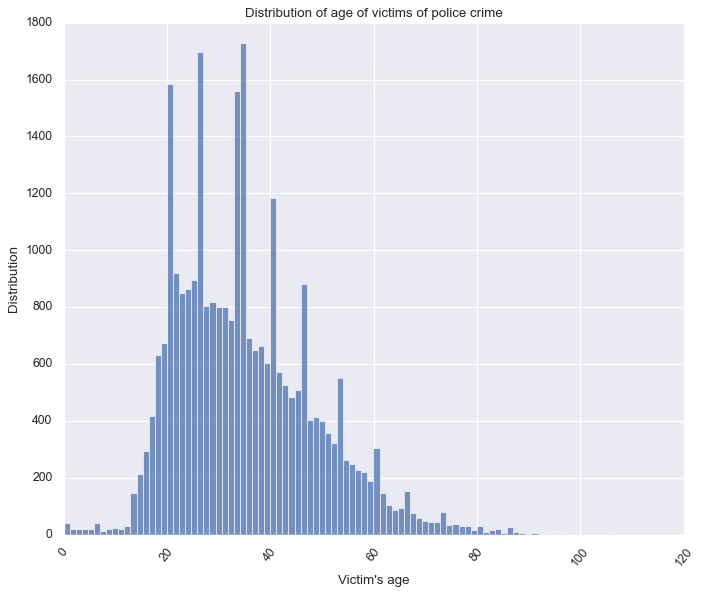

In [541]:
# Gráfico

import seaborn as sns
sns.histplot(data=df_encounters, x=df_encounters["Subject's age"])
plt.xlabel("Victim's age")
plt.ylabel("Distribution")
plt.title("Distribution of age of victims of police crime")
plt.xticks(rotation=50)
sns.set(rc = {'figure.figsize':(10,8)})

## Interpretación
Podemos ver que, en el caso de las víctimas afroamericanas, la media es de 31 años (un poco menos que toda la población), el primer cuartil está alrededor de los 22 años.

In [542]:
# Resumen numérico

In [543]:
# Generamos la tabla de muertes por año y por estado

state=df_encounters.value_counts(["Location of death (state)","Date (Year)"])
state

Location of death (state)  Date (Year)
CA                         2013           281
                           2015           268
                           2011           251
                           2005           245
                           2014           239
                                         ... 
SD                         2004             1
RI                         2005             1
NH                         2014             1
                           2010             1
RI                         2017             1
Length: 1035, dtype: int64

In [544]:
# Convertimos en df la tabla de muertes por estado y año

state2 = pd.DataFrame(state)
state2.columns =['deaths']
state2.reset_index(inplace=True)
state2.rename(columns = {'Location of death (state)':'State','Date (Year)':'Year'}, inplace = True)
state2

,State,Year,deaths
0,CA,2013,281
1,CA,2015,268
2,CA,2011,251
3,CA,2005,245
4,CA,2014,239
...,...,...,...
1030,SD,2004,1
1031,RI,2005,1
1032,NH,2014,1
1033,NH,2010,1


In [545]:
# Generamos la tabla de muertes por género

gender_df =df_encounters.value_counts(["Subject's gender"])
gender_df

Subject's gender
Male                25785
Female               2712
Transgender            19
dtype: int64

In [546]:
# Convertimos en df la tabla de muertes por género

gender_df2 = pd.DataFrame(gender_df)
gender_df2.columns =['Total_deaths']
gender_df2.reset_index(inplace=True)
gender_df2.rename(columns = {"Subject's gender":'Gender'}, inplace = True)
gender_df2

,Gender,Total_deaths
0,Male,25785
1,Female,2712
2,Transgender,19


<AxesSubplot:xlabel="Subject's gender">

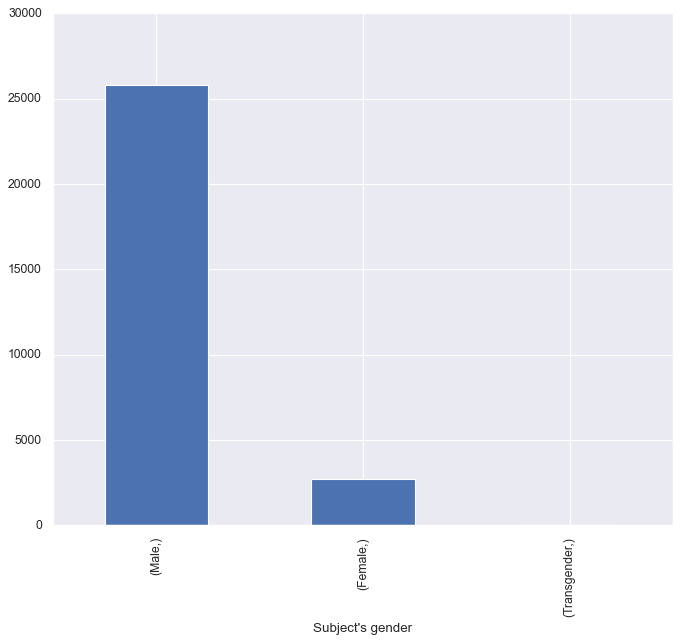

In [547]:
# Gráfico de barras de muertes por género (todas las etnias y edades incluidas)

gender_df.plot(kind = 'bar')

## Interpretación
Vemos que gran mayoría de las víctimas son **hombres**. Menos de un 10% son mujeres, y en solo 19 de los casos las víctimas están identificadas como transgénero.

# PROYECTO DS ENTREGA III 

Realizamos el feature selection de manera **manual**

In [548]:
df_encounters.describe()

,Unique ID,Subject's age,Location of death (zip code),Latitude,Longitude,Unique ID formula,Unique identifier (redundant),Date (Year)
count,28616.000000,28617.000000,28427.000000,28616.000000,28616.000000,2.000000,28616.000000,28617.000000
mean,14310.393311,35.160289,58434.101981,36.766732,-95.442548,28059.000000,14310.393311,2011.190272
std,8262.345824,13.552069,27982.480682,5.160425,16.340158,794.788022,8262.345824,5.838028
min,1.000000,0.000000,1013.000000,19.034681,-165.591880,27497.000000,1.000000,2000.000000
25%,7154.750000,25.000000,33160.000000,33.540840,-111.320045,27778.000000,7154.750000,2006.000000
50%,14311.500000,34.000000,60661.000000,36.692131,-90.556802,28059.000000,14311.500000,2012.000000
75%,21465.250000,43.000000,85044.000000,40.426043,-82.576292,28340.000000,21465.250000,2016.000000
max,28621.000000,107.000000,99921.000000,71.301250,-67.266033,28621.000000,28621.000000,2100.000000


In [549]:
# Cargamos la data de la población total por estado y año. Arriba habíamos creado el dataframe state2 con los estados 
# y cantidad de muertes. 

population_states= pd.read_csv('population_states.csv')
population_states

,State,Year,Population
0,AL,2000,4452173
1,AL,2001,4467634
2,AL,2002,4480089
3,AL,2003,4503491
4,AL,2004,4530729
...,...,...,...
1066,WY,2016,585243
1067,WY,2017,579994
1068,WY,2018,579054
1069,WY,2019,580116


In [550]:
# Hacemos un join del df de Muertes por estado junto con el de Population  

join_states = pd.merge(population_states, state2, on=['State', 'Year'], how='inner')
join_states

,State,Year,Population,deaths
0,AL,2000,4452173,11
1,AL,2001,4467634,12
2,AL,2002,4480089,15
3,AL,2003,4503491,24
4,AL,2004,4530729,22
...,...,...,...,...
1030,WY,2016,585243,3
1031,WY,2017,579994,5
1032,WY,2018,579054,7
1033,WY,2019,580116,3


In [551]:
# Calculamos la tasa de muertes cada 100 mil habitantes

join_states["death_rate_per_100kh"] = (join_states["deaths"] / join_states["Population"]) * 100000
join_states

,State,Year,Population,deaths,death_rate_per_100kh
0,AL,2000,4452173,11,0.247070
1,AL,2001,4467634,12,0.268599
2,AL,2002,4480089,15,0.334815
3,AL,2003,4503491,24,0.532920
4,AL,2004,4530729,22,0.485573
...,...,...,...,...,...
1030,WY,2016,585243,3,0.512608
1031,WY,2017,579994,5,0.862078
1032,WY,2018,579054,7,1.208868
1033,WY,2019,580116,3,0.517138


In [552]:
# Revisamos el describe de join_state para conocer los datos de tasa de muertes por cada 100mil habitantes

join_states.describe()

,Year,Population,deaths,death_rate_per_100kh
count,1035.000000,1.035000e+03,1035.000000,1035.000000
mean,2010.131401,6.218822e+06,27.648309,0.463001
std,6.055684,6.827838e+06,36.956192,0.262080
min,2000.000000,4.943000e+05,1.000000,0.029310
25%,2005.000000,1.828752e+06,7.000000,0.282608
50%,2010.000000,4.440306e+06,19.000000,0.420979
75%,2015.000000,7.165758e+06,34.000000,0.586804
max,2020.000000,3.943761e+07,281.000000,2.026247


In [553]:
# Calculamos la tasa de muerte promedio por estado

mean_death_rate = join_states.groupby(["State"])["death_rate_per_100kh"].mean()
mean_death_rate

State
AK    0.797150
AL    0.634776
AR    0.582398
AZ    0.610993
CA    0.586793
CO    0.573738
CT    0.180725
DC    0.676806
DE    0.376793
FL    0.427388
GA    0.527081
HI    0.375695
IA    0.410132
ID    0.437100
IL    0.391863
IN    0.390167
KS    0.661267
KY    0.423399
LA    0.622997
MA    0.134994
MD    0.418997
ME    0.361409
MI    0.401515
MN    0.285566
MO    0.704737
MS    0.660623
MT    0.471104
NC    0.294906
ND    0.398176
NE    0.512312
NH    0.220958
NJ    0.280483
NM    0.902072
NV    0.672488
NY    0.158886
OH    0.387798
OK    0.834726
OR    0.388904
PA    0.348088
RI    0.144447
SC    0.556764
SD    0.472812
TN    0.462628
TX    0.463614
UT    0.399208
VA    0.352837
VT    0.329586
WA    0.429461
WI    0.363070
WV    0.447662
WY    0.537863
Name: death_rate_per_100kh, dtype: float64

In [554]:
# Revisamos el describe de mean_death_rate para conocer los datos de tasa de muertes por cada 100mil habitantes

mean_death_rate.describe()

count    51.000000
mean      0.460509
std       0.171066
min       0.134994
25%       0.369383
50%       0.427388
75%       0.578068
max       0.902072
Name: death_rate_per_100kh, dtype: float64

In [555]:
# Transformamos en dataframe

mean_death_rate_2 = pd.DataFrame(mean_death_rate)
mean_death_rate_2.columns =['Total_deaths']
mean_death_rate_2.reset_index(inplace=True)
mean_death_rate_2


,State,Total_deaths
0,AK,0.797150
1,AL,0.634776
2,AR,0.582398
3,AZ,0.610993
4,CA,0.586793
5,CO,0.573738
6,CT,0.180725
7,DC,0.676806
8,DE,0.376793
9,FL,0.427388


<AxesSubplot:xlabel='State'>

<Figure size 1400x700 with 0 Axes>

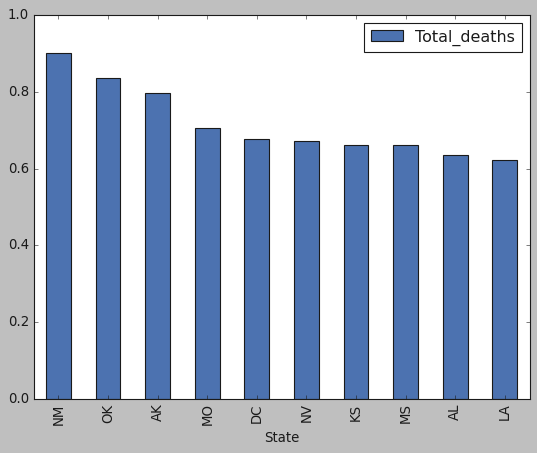

In [556]:
# Gráfico

mean_death_rate_3= mean_death_rate_2.sort_values(by='Total_deaths', ascending=False)
mean_death_rate_3= mean_death_rate_3.head(10)

mean_death_rate_3=mean_death_rate_3.set_index('State')
plt.style.use('classic')

fig = plt.figure(dpi=100, figsize=(14, 7)) #dpi=100 instead of dpi=256

mean_death_rate_3.plot(kind = 'bar')

In [557]:
# Generamos Race para conocer los datos de muertes por etnia, año y estado

race_year=df_encounters.value_counts(["Subject's race","Date (Year)","Location of death (state)"])
race_year

Subject's race           Date (Year)  Location of death (state)
Race unspecified         2005         CA                           119
                         2003         CA                           107
Hispanic/Latino          2015         CA                           101
                         2013         CA                           100
                         2017         CA                            98
                                                                  ... 
Native American/Alaskan  2019         IA                             1
                         2018         WA                             1
                                      UT                             1
                                      NV                             1
European-American/White  2001         LA                             1
Length: 3468, dtype: int64

In [558]:
# Convertimos Race a un df

race_year2 = pd.DataFrame(race_year)
race_year2.columns =['deaths']
race_year2.reset_index(inplace=True)
race_year2.rename(columns = {"Subject's race":'Race','Date (Year)':'Year','Location of death (state)':'State'}, inplace = True)
race_year2

,Race,Year,State,deaths
0,Race unspecified,2005,CA,119
1,Race unspecified,2003,CA,107
2,Hispanic/Latino,2015,CA,101
3,Hispanic/Latino,2013,CA,100
4,Hispanic/Latino,2017,CA,98
...,...,...,...,...
3463,Native American/Alaskan,2019,IA,1
3464,Native American/Alaskan,2018,WA,1
3465,Native American/Alaskan,2018,UT,1
3466,Native American/Alaskan,2018,NV,1


In [559]:
# Hacemos un join del df de Race junto con el de Population

join_states_race = pd.merge(race_year2, join_states, on=['State', 'Year'], how='inner')
join_states_race

,Race,Year,State,deaths_x,Population,deaths_y,death_rate_per_100kh
0,Race unspecified,2005,CA,119,35827943,245,0.683824
1,Hispanic/Latino,2005,CA,53,35827943,245,0.683824
2,European-American/White,2005,CA,32,35827943,245,0.683824
3,African-American/Black,2005,CA,28,35827943,245,0.683824
4,Asian/Pacific Islander,2005,CA,10,35827943,245,0.683824
...,...,...,...,...,...,...,...
3463,European-American/White,2002,VT,1,615442,1,0.162485
3464,European-American/White,2002,WY,1,500017,1,0.199993
3465,Race unspecified,2001,ME,1,1285692,2,0.155558
3466,European-American/White,2001,ME,1,1285692,2,0.155558


In [560]:
# Generamos Gender para conocer los datos de muertes por género, año y estado

gender=df_encounters.value_counts(["Subject's gender","Date (Year)","Location of death (state)"])
gender

Subject's gender  Date (Year)  Location of death (state)
Male              2013         CA                           256
                  2015         CA                           240
                  2011         CA                           230
                  2005         CA                           228
                  2012         CA                           218
                                                           ... 
                  2016         DE                             1
Female            2013         UT                             1
                               WI                             1
                               WV                             1
Transgender       2020         FL                             1
Length: 1774, dtype: int64

In [561]:
# Convertimos Gender a un df

gender2 = pd.DataFrame(gender)
gender2.columns =['deaths']
gender2.reset_index(inplace=True)
gender2.rename(columns = {"Subject's gender":'Gender','Date (Year)':'Year','Location of death (state)':'State'}, inplace = True)
gender2

,Gender,Year,State,deaths
0,Male,2013,CA,256
1,Male,2015,CA,240
2,Male,2011,CA,230
3,Male,2005,CA,228
4,Male,2012,CA,218
...,...,...,...,...
1769,Male,2016,DE,1
1770,Female,2013,UT,1
1771,Female,2013,WI,1
1772,Female,2013,WV,1


In [562]:
# Hacemos un join del df de Gender junto con el de Race+Population

state_pop_race_gender = pd.merge(join_states_race, gender2, on=['State', 'Year'], how='inner')
state_pop_race_gender

,Race,Year,State,deaths_x,Population,deaths_y,death_rate_per_100kh,Gender,deaths
0,Race unspecified,2005,CA,119,35827943,245,0.683824,Male,228
1,Race unspecified,2005,CA,119,35827943,245,0.683824,Female,16
2,Race unspecified,2005,CA,119,35827943,245,0.683824,Transgender,1
3,Hispanic/Latino,2005,CA,53,35827943,245,0.683824,Male,228
4,Hispanic/Latino,2005,CA,53,35827943,245,0.683824,Female,16
...,...,...,...,...,...,...,...,...,...
6309,European-American/White,2002,VT,1,615442,1,0.162485,Male,1
6310,European-American/White,2002,WY,1,500017,1,0.199993,Male,1
6311,Race unspecified,2001,ME,1,1285692,2,0.155558,Male,2
6312,European-American/White,2001,ME,1,1285692,2,0.155558,Male,2


In [563]:
# Generamos Age para conocer los datos de promedio de edad de las víctimas, junto con el dato de género, año y estado

age = df_encounters.groupby(["Subject's gender","Date (Year)","Location of death (state)"])["Subject's age"].mean()
age

Subject's gender  Date (Year)  Location of death (state)
Female            2000         AL                           36.0
                               AR                           35.0
                               CA                           34.0
                               CO                           47.5
                               FL                           27.4
                                                            ... 
Transgender       2018         TX                           28.0
                  2019         NY                           32.0
                               OR                           33.0
                  2020         CO                           33.0
                               FL                           38.0
Name: Subject's age, Length: 1774, dtype: float64

In [564]:
# Convertimos Age a un df

age2 = pd.DataFrame(age)
age2.columns =['Mean age']
age2.reset_index(inplace=True)
age2.rename(columns = {"Subject's gender":'Gender','Date (Year)':'Year','Location of death (state)':'State'}, inplace = True)
age2

,Gender,Year,State,Mean age
0,Female,2000,AL,36.0
1,Female,2000,AR,35.0
2,Female,2000,CA,34.0
3,Female,2000,CO,47.5
4,Female,2000,FL,27.4
...,...,...,...,...
1769,Transgender,2018,TX,28.0
1770,Transgender,2019,NY,32.0
1771,Transgender,2019,OR,33.0
1772,Transgender,2020,CO,33.0


In [565]:
# Hacemos un join del df de Age junto con el de Race+Population+Gender

full_df = pd.merge(state_pop_race_gender,age2, on=['State', 'Year','Gender'], how='inner')
full_df

,Race,Year,State,deaths_x,Population,deaths_y,death_rate_per_100kh,Gender,deaths,Mean age
0,Race unspecified,2005,CA,119,35827943,245,0.683824,Male,228,31.688596
1,Hispanic/Latino,2005,CA,53,35827943,245,0.683824,Male,228,31.688596
2,European-American/White,2005,CA,32,35827943,245,0.683824,Male,228,31.688596
3,African-American/Black,2005,CA,28,35827943,245,0.683824,Male,228,31.688596
4,Asian/Pacific Islander,2005,CA,10,35827943,245,0.683824,Male,228,31.688596
...,...,...,...,...,...,...,...,...,...,...
6309,European-American/White,2002,VT,1,615442,1,0.162485,Male,1,63.000000
6310,European-American/White,2002,WY,1,500017,1,0.199993,Male,1,42.000000
6311,Race unspecified,2001,ME,1,1285692,2,0.155558,Male,2,58.000000
6312,European-American/White,2001,ME,1,1285692,2,0.155558,Male,2,58.000000


In [566]:
# Filtramos el df que utilizaremos para entrenar el modelo según el perfil de población más atacado por la policía: 
# hombres entre 22 y 38 años. También filtramos los estados que tienen una tasa de homicidios policiales por encima de 
# la media (0.46 cada 100mil habitantes) y por debajo de 0.8 dado el comportamiento en el describe que teníamos unos máximos de 0.99 fuera de los quartiles de la variable

full_df_filtered = full_df[(full_df['Gender']  == "Male") & (full_df['death_rate_per_100kh'] >= 0.46) & (full_df['death_rate_per_100kh'] <= 0.8) & 
                    (full_df['Mean age'] >= 22) & (full_df['Mean age'] <= 38) ]
full_df_filtered

,Race,Year,State,deaths_x,Population,deaths_y,death_rate_per_100kh,Gender,deaths,Mean age
0,Race unspecified,2005,CA,119,35827943,245,0.683824,Male,228,31.688596
1,Hispanic/Latino,2005,CA,53,35827943,245,0.683824,Male,228,31.688596
2,European-American/White,2005,CA,32,35827943,245,0.683824,Male,228,31.688596
3,African-American/Black,2005,CA,28,35827943,245,0.683824,Male,228,31.688596
4,Asian/Pacific Islander,2005,CA,10,35827943,245,0.683824,Male,228,31.688596
...,...,...,...,...,...,...,...,...,...,...
6141,European-American/White,2008,VT,2,624151,3,0.480653,Male,3,26.333333
6142,Race unspecified,2008,VT,1,624151,3,0.480653,Male,3,26.333333
6263,Hispanic/Latino,2019,WY,1,580116,3,0.517138,Male,3,36.666667
6264,European-American/White,2019,WY,1,580116,3,0.517138,Male,3,36.666667


In [567]:
# Del df anterior, filtramos aquellas etnias más atacadas: europeo/blanco, afroamericano/negro, hispánico/latino

full_df_filtered_race = full_df_filtered[(full_df_filtered['Race'] == "European-American/White") | (full_df_filtered['Race'] == "Hispanic/Latino")| (full_df_filtered['Race'] == "African-American/Black")]
full_df_filtered_race

,Race,Year,State,deaths_x,Population,deaths_y,death_rate_per_100kh,Gender,deaths,Mean age
1,Hispanic/Latino,2005,CA,53,35827943,245,0.683824,Male,228,31.688596
2,European-American/White,2005,CA,32,35827943,245,0.683824,Male,228,31.688596
3,African-American/Black,2005,CA,28,35827943,245,0.683824,Male,228,31.688596
22,Hispanic/Latino,2003,CA,58,35253159,229,0.649587,Male,200,32.910000
23,European-American/White,2003,CA,31,35253159,229,0.649587,Male,200,32.910000
...,...,...,...,...,...,...,...,...,...,...
6133,European-American/White,2004,WY,2,509106,4,0.785691,Male,4,36.500000
6134,Hispanic/Latino,2004,WY,1,509106,4,0.785691,Male,4,36.500000
6141,European-American/White,2008,VT,2,624151,3,0.480653,Male,3,26.333333
6263,Hispanic/Latino,2019,WY,1,580116,3,0.517138,Male,3,36.666667


In [568]:
# Dropeamos las columnas de Deaths duplicadas que contienen totales que no son útiles para nuestro modelo

full_df_final = full_df_filtered_race.drop(columns=['deaths_y','deaths','Gender'])
full_df_final.rename(columns = {'deaths_x':'Deaths'}, inplace = True)
full_df_final

,Race,Year,State,Deaths,Population,death_rate_per_100kh,Mean age
1,Hispanic/Latino,2005,CA,53,35827943,0.683824,31.688596
2,European-American/White,2005,CA,32,35827943,0.683824,31.688596
3,African-American/Black,2005,CA,28,35827943,0.683824,31.688596
22,Hispanic/Latino,2003,CA,58,35253159,0.649587,32.910000
23,European-American/White,2003,CA,31,35253159,0.649587,32.910000
...,...,...,...,...,...,...,...
6133,European-American/White,2004,WY,2,509106,0.785691,36.500000
6134,Hispanic/Latino,2004,WY,1,509106,0.785691,36.500000
6141,European-American/White,2008,VT,2,624151,0.480653,26.333333
6263,Hispanic/Latino,2019,WY,1,580116,0.517138,36.666667


In [569]:
# Hacemos un describe de nuestro df final

full_df_final.describe()

,Year,Deaths,Population,death_rate_per_100kh,Mean age
count,635.000000,635.000000,6.350000e+02,635.000000,635.000000
mean,2010.651969,13.333858,9.456282e+06,0.587903,34.026425
std,5.554730,17.276067,1.046691e+07,0.089109,2.445119
min,2000.000000,1.000000,5.091060e+05,0.461609,23.000000
25%,2006.000000,2.000000,3.093935e+06,0.511001,32.661017
50%,2011.000000,6.000000,5.627367e+06,0.575089,34.206186
75%,2015.000000,17.000000,9.937295e+06,0.651115,35.846154
max,2020.000000,101.000000,3.943761e+07,0.798286,37.967742


In [570]:
# Generamos las columnas de Race a través de Get Dummies

full_df_encoded = pd.get_dummies(full_df_final, columns=['Race'],drop_first=False)
full_df_encoded


,Year,State,Deaths,Population,death_rate_per_100kh,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino
1,2005,CA,53,35827943,0.683824,31.688596,0,0,1
2,2005,CA,32,35827943,0.683824,31.688596,0,1,0
3,2005,CA,28,35827943,0.683824,31.688596,1,0,0
22,2003,CA,58,35253159,0.649587,32.910000,0,0,1
23,2003,CA,31,35253159,0.649587,32.910000,0,1,0
...,...,...,...,...,...,...,...,...,...
6133,2004,WY,2,509106,0.785691,36.500000,0,1,0
6134,2004,WY,1,509106,0.785691,36.500000,0,0,1
6141,2008,VT,2,624151,0.480653,26.333333,0,1,0
6263,2019,WY,1,580116,0.517138,36.666667,0,0,1


In [571]:
# Codificamos el estado a través de Label encoder

from sklearn.preprocessing import LabelEncoder #https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
full_df_encoded['State_label_encoded']= LabelEncoder().fit_transform(full_df_encoded.State)
full_df_encoded

,Year,State,Deaths,Population,death_rate_per_100kh,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded
1,2005,CA,53,35827943,0.683824,31.688596,0,0,1,4
2,2005,CA,32,35827943,0.683824,31.688596,0,1,0,4
3,2005,CA,28,35827943,0.683824,31.688596,1,0,0,4
22,2003,CA,58,35253159,0.649587,32.910000,0,0,1,4
23,2003,CA,31,35253159,0.649587,32.910000,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...
6133,2004,WY,2,509106,0.785691,36.500000,0,1,0,44
6134,2004,WY,1,509106,0.785691,36.500000,0,0,1,44
6141,2008,VT,2,624151,0.480653,26.333333,0,1,0,40
6263,2019,WY,1,580116,0.517138,36.666667,0,0,1,44


In [572]:
# Realizamos el cálculo de correlación de nuestras variables

full_df_encoded.corr()

,Year,Deaths,Population,death_rate_per_100kh,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded
Year,1.000000,0.204661,0.049478,0.135295,0.356691,0.027368,-0.014247,-0.013351,0.070427
Deaths,0.204661,1.000000,0.836921,0.043687,0.150937,-0.055283,0.057578,-0.004895,-0.217912
Population,0.049478,0.836921,1.000000,-0.065964,0.091516,0.018163,-0.081430,0.070775,-0.306570
death_rate_per_100kh,0.135295,0.043687,-0.065964,1.000000,0.053637,0.016685,-0.014989,-0.001166,-0.055179
Mean age,0.356691,0.150937,0.091516,0.053637,1.000000,0.035038,-0.058932,0.027931,0.067039
Race_African-American/Black,0.027368,-0.055283,0.018163,0.016685,0.035038,1.000000,-0.575987,-0.426537,-0.010721
Race_European-American/White,-0.014247,0.057578,-0.081430,-0.014989,-0.058932,-0.575987,1.000000,-0.493688,0.020411
Race_Hispanic/Latino,-0.013351,-0.004895,0.070775,-0.001166,0.027931,-0.426537,-0.493688,1.000000,-0.011178
State_label_encoded,0.070427,-0.217912,-0.306570,-0.055179,0.067039,-0.010721,0.020411,-0.011178,1.000000


# DESAFÍO DATA WRANGLING

In [573]:
# Segundo dataset con características económicas de USA desde 1980 hasta 2021

df_USA_Economics= pd.read_csv('macro_monthly.csv')
df_USA_Economics

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.400
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.900
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.400
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.000
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.800
...,...,...,...,...,...,...,...,...,...,...,...,...
485,2021-06-01,5.9,9.5,20463.275,15603.3,15802.0,115.39,1.519091,0.078000,1579265.0,100.4704,278.140
486,2021-07-01,5.4,10.6,20589.975,15739.4,15804.8,117.01,1.318571,0.098065,1581128.0,101.2442,279.054
487,2021-08-01,5.2,9.9,20788.780,15723.0,15975.8,117.27,1.283182,0.092258,1596816.0,101.1061,279.338
488,2021-09-01,4.8,8.2,20981.450,15468.7,16076.4,117.16,1.374762,0.079333,1594756.0,100.0811,280.017


In [574]:
# Convertimos la columna a fecha 

df_USA_Economics["DATE"] = pd.to_datetime(df_USA_Economics["DATE"])

In [575]:
# Separamos el año

df_USA_Economics['Year'] = pd.DatetimeIndex(df_USA_Economics['DATE']).year
df_USA_Economics

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi,Year
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.400,1981
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.900,1981
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.400,1981
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.000,1981
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.800,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2021-06-01,5.9,9.5,20463.275,15603.3,15802.0,115.39,1.519091,0.078000,1579265.0,100.4704,278.140,2021
486,2021-07-01,5.4,10.6,20589.975,15739.4,15804.8,117.01,1.318571,0.098065,1581128.0,101.2442,279.054,2021
487,2021-08-01,5.2,9.9,20788.780,15723.0,15975.8,117.27,1.283182,0.092258,1596816.0,101.1061,279.338,2021
488,2021-09-01,4.8,8.2,20981.450,15468.7,16076.4,117.16,1.374762,0.079333,1594756.0,100.0811,280.017,2021


In [576]:
# Dropeamos las columnas que no nos interesan para nuestro análisis. Renombramos las demás para que el indicador sea más claro.
# Reordenamos las columnas para que Year quede primera.

df_USA_Economics_2 = df_USA_Economics.drop(columns=['m2','reer','ir','ffer','tcs', 'indpro','ccpi','DATE'])
df_USA_Economics_2.rename(columns = {'unrate':'Unemployment Rate','psr':'Personal Saving Rate','dspic':'Real Disposable Personal Income','pce':'Personal Consumption Expenditures'}, inplace = True)
df_USA_Economics_2 = df_USA_Economics_2[['Year', 'Unemployment Rate', 'Personal Saving Rate', 'Real Disposable Personal Income', 'Personal Consumption Expenditures']]
df_USA_Economics_2

,Year,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
0,1981,7.5,10.9,4980.4,1870.0
1,1981,7.4,10.8,4965.0,1884.2
2,1981,7.4,10.8,4979.0,1902.9
3,1981,7.2,10.9,4965.1,1904.4
4,1981,7.5,11.0,4974.8,1913.8
...,...,...,...,...,...
485,2021,5.9,9.5,15603.3,15802.0
486,2021,5.4,10.6,15739.4,15804.8
487,2021,5.2,9.9,15723.0,15975.8
488,2021,4.8,8.2,15468.7,16076.4


In [577]:
# Calculamos la media de cada indicador por año

mean_USA_Economics = df_USA_Economics_2.groupby(["Year"])[["Unemployment Rate","Personal Saving Rate","Real Disposable Personal Income","Personal Consumption Expenditures"]].mean()
mean_USA_Economics

,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
Year,,,,
1981,7.616667,11.716667,5034.250000,1933.941667
1982,9.708333,12.041667,5145.391667,2071.241667
1983,9.600000,10.050000,5322.808333,2281.608333
1984,7.508333,11.325000,5688.058333,2492.333333
1985,7.191667,9.166667,5859.275000,2712.841667
1986,7.000000,8.825000,6081.841667,2886.275000
1987,6.175000,7.908333,6216.175000,3076.275000
1988,5.491667,8.475000,6508.583333,3330.000000
1989,5.258333,8.375000,6699.375000,3576.766667


In [578]:
df_USA_Economics_2.describe()

,Year,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
count,490.000000,490.000000,490.000000,490.000000,490.000000
mean,2000.918367,6.210612,7.487959,9743.822653,7520.984082
std,11.798993,1.775719,3.025157,3122.829102,3967.478105
min,1981.000000,3.500000,2.100000,4965.000000,1870.000000
25%,1991.000000,4.900000,5.900000,6861.025000,3908.575000
50%,2001.000000,5.700000,7.200000,9715.600000,7029.900000
75%,2011.000000,7.300000,8.600000,12115.900000,10745.625000
max,2021.000000,14.800000,33.800000,19119.500000,16290.700000


In [579]:
# Joineamos la tabla de información económica con nuestro dataframe

full_df_with_economics = pd.merge(full_df_encoded, mean_USA_Economics, on=['Year'], how='inner')
full_df_with_economics

,Year,State,Deaths,Population,death_rate_per_100kh,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
0,2005,CA,53,35827943,0.683824,31.688596,0,0,1,4,5.083333,2.858333,10811.366667,8769.058333
1,2005,CA,32,35827943,0.683824,31.688596,0,1,0,4,5.083333,2.858333,10811.366667,8769.058333
2,2005,CA,28,35827943,0.683824,31.688596,1,0,0,4,5.083333,2.858333,10811.366667,8769.058333
3,2005,TX,45,22778123,0.491700,32.182692,0,1,0,37,5.083333,2.858333,10811.366667,8769.058333
4,2005,TX,33,22778123,0.491700,32.182692,0,0,1,37,5.083333,2.858333,10811.366667,8769.058333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,2020,WI,3,5832655,0.514346,32.120000,0,0,1,42,8.108333,16.308333,15677.350000,14047.550000
631,2020,UT,7,3249879,0.584637,32.777778,0,1,0,38,8.108333,16.308333,15677.350000,14047.550000
632,2020,UT,3,3249879,0.584637,32.777778,0,0,1,38,8.108333,16.308333,15677.350000,14047.550000
633,2020,UT,1,3249879,0.584637,32.777778,1,0,0,38,8.108333,16.308333,15677.350000,14047.550000


# DESAFÍO INSIGHTS

In [580]:
# Primeras 5 líneas del dataframe
full_df_with_economics.head()

,Year,State,Deaths,Population,death_rate_per_100kh,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
0,2005,CA,53,35827943,0.683824,31.688596,0,0,1,4,5.083333,2.858333,10811.366667,8769.058333
1,2005,CA,32,35827943,0.683824,31.688596,0,1,0,4,5.083333,2.858333,10811.366667,8769.058333
2,2005,CA,28,35827943,0.683824,31.688596,1,0,0,4,5.083333,2.858333,10811.366667,8769.058333
3,2005,TX,45,22778123,0.491700,32.182692,0,1,0,37,5.083333,2.858333,10811.366667,8769.058333
4,2005,TX,33,22778123,0.491700,32.182692,0,0,1,37,5.083333,2.858333,10811.366667,8769.058333


In [581]:
# Revisamos la info del df
full_df_with_economics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 0 to 634
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               635 non-null    int64  
 1   State                              635 non-null    object 
 2   Deaths                             635 non-null    int64  
 3   Population                         635 non-null    int64  
 4   death_rate_per_100kh               635 non-null    float64
 5   Mean age                           635 non-null    float64
 6   Race_African-American/Black        635 non-null    uint8  
 7   Race_European-American/White       635 non-null    uint8  
 8   Race_Hispanic/Latino               635 non-null    uint8  
 9   State_label_encoded                635 non-null    int32  
 10  Unemployment Rate                  635 non-null    float64
 11  Personal Saving Rate               635 non-null    float64

In [582]:
# Describe
full_df_with_economics.describe()

,Year,Deaths,Population,death_rate_per_100kh,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
count,635.000000,635.000000,6.350000e+02,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,2010.651969,13.333858,9.456282e+06,0.587903,34.026425,0.332283,0.400000,0.267717,20.288189,6.085105,6.371234,12260.767008,10756.390486
std,5.554730,17.276067,1.046691e+07,0.089109,2.445119,0.471403,0.490284,0.443118,12.735495,1.821808,2.477860,1513.994250,2115.657732
min,2000.000000,1.000000,5.091060e+05,0.461609,23.000000,0.000000,0.000000,0.000000,0.000000,3.683333,2.858333,9501.216667,6767.175000
25%,2006.000000,2.000000,3.093935e+06,0.511001,32.661017,0.000000,0.000000,0.000000,9.000000,4.616667,4.900000,11226.591667,9277.250000
50%,2011.000000,6.000000,5.627367e+06,0.575089,34.206186,0.000000,0.000000,0.000000,19.000000,5.541667,6.233333,12107.266667,10698.858333
75%,2015.000000,17.000000,9.937295e+06,0.651115,35.846154,1.000000,1.000000,1.000000,31.000000,8.075000,7.275000,13330.075000,12263.483333
max,2020.000000,101.000000,3.943761e+07,0.798286,37.967742,1.000000,1.000000,1.000000,44.000000,9.608333,16.308333,15677.350000,14428.683333


## Insights
- ¿Cuáles son los rangos de edad más vulnerables a la violencia policial según la etnia?
Las edades más vulnerables son **entre 23 y 35 años**

In [583]:
# Dropeamos las variables categórias (que estaban codificadas)

full_df_with_economics_drop_cat = full_df_with_economics.drop(columns=['Year','State','Race_African-American/Black','Race_European-American/White','Race_Hispanic/Latino','State_label_encoded'])
full_df_with_economics_drop_cat

,Deaths,Population,death_rate_per_100kh,Mean age,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
0,53,35827943,0.683824,31.688596,5.083333,2.858333,10811.366667,8769.058333
1,32,35827943,0.683824,31.688596,5.083333,2.858333,10811.366667,8769.058333
2,28,35827943,0.683824,31.688596,5.083333,2.858333,10811.366667,8769.058333
3,45,22778123,0.491700,32.182692,5.083333,2.858333,10811.366667,8769.058333
4,33,22778123,0.491700,32.182692,5.083333,2.858333,10811.366667,8769.058333
...,...,...,...,...,...,...,...,...
630,3,5832655,0.514346,32.120000,8.108333,16.308333,15677.350000,14047.550000
631,7,3249879,0.584637,32.777778,8.108333,16.308333,15677.350000,14047.550000
632,3,3249879,0.584637,32.777778,8.108333,16.308333,15677.350000,14047.550000
633,1,3249879,0.584637,32.777778,8.108333,16.308333,15677.350000,14047.550000


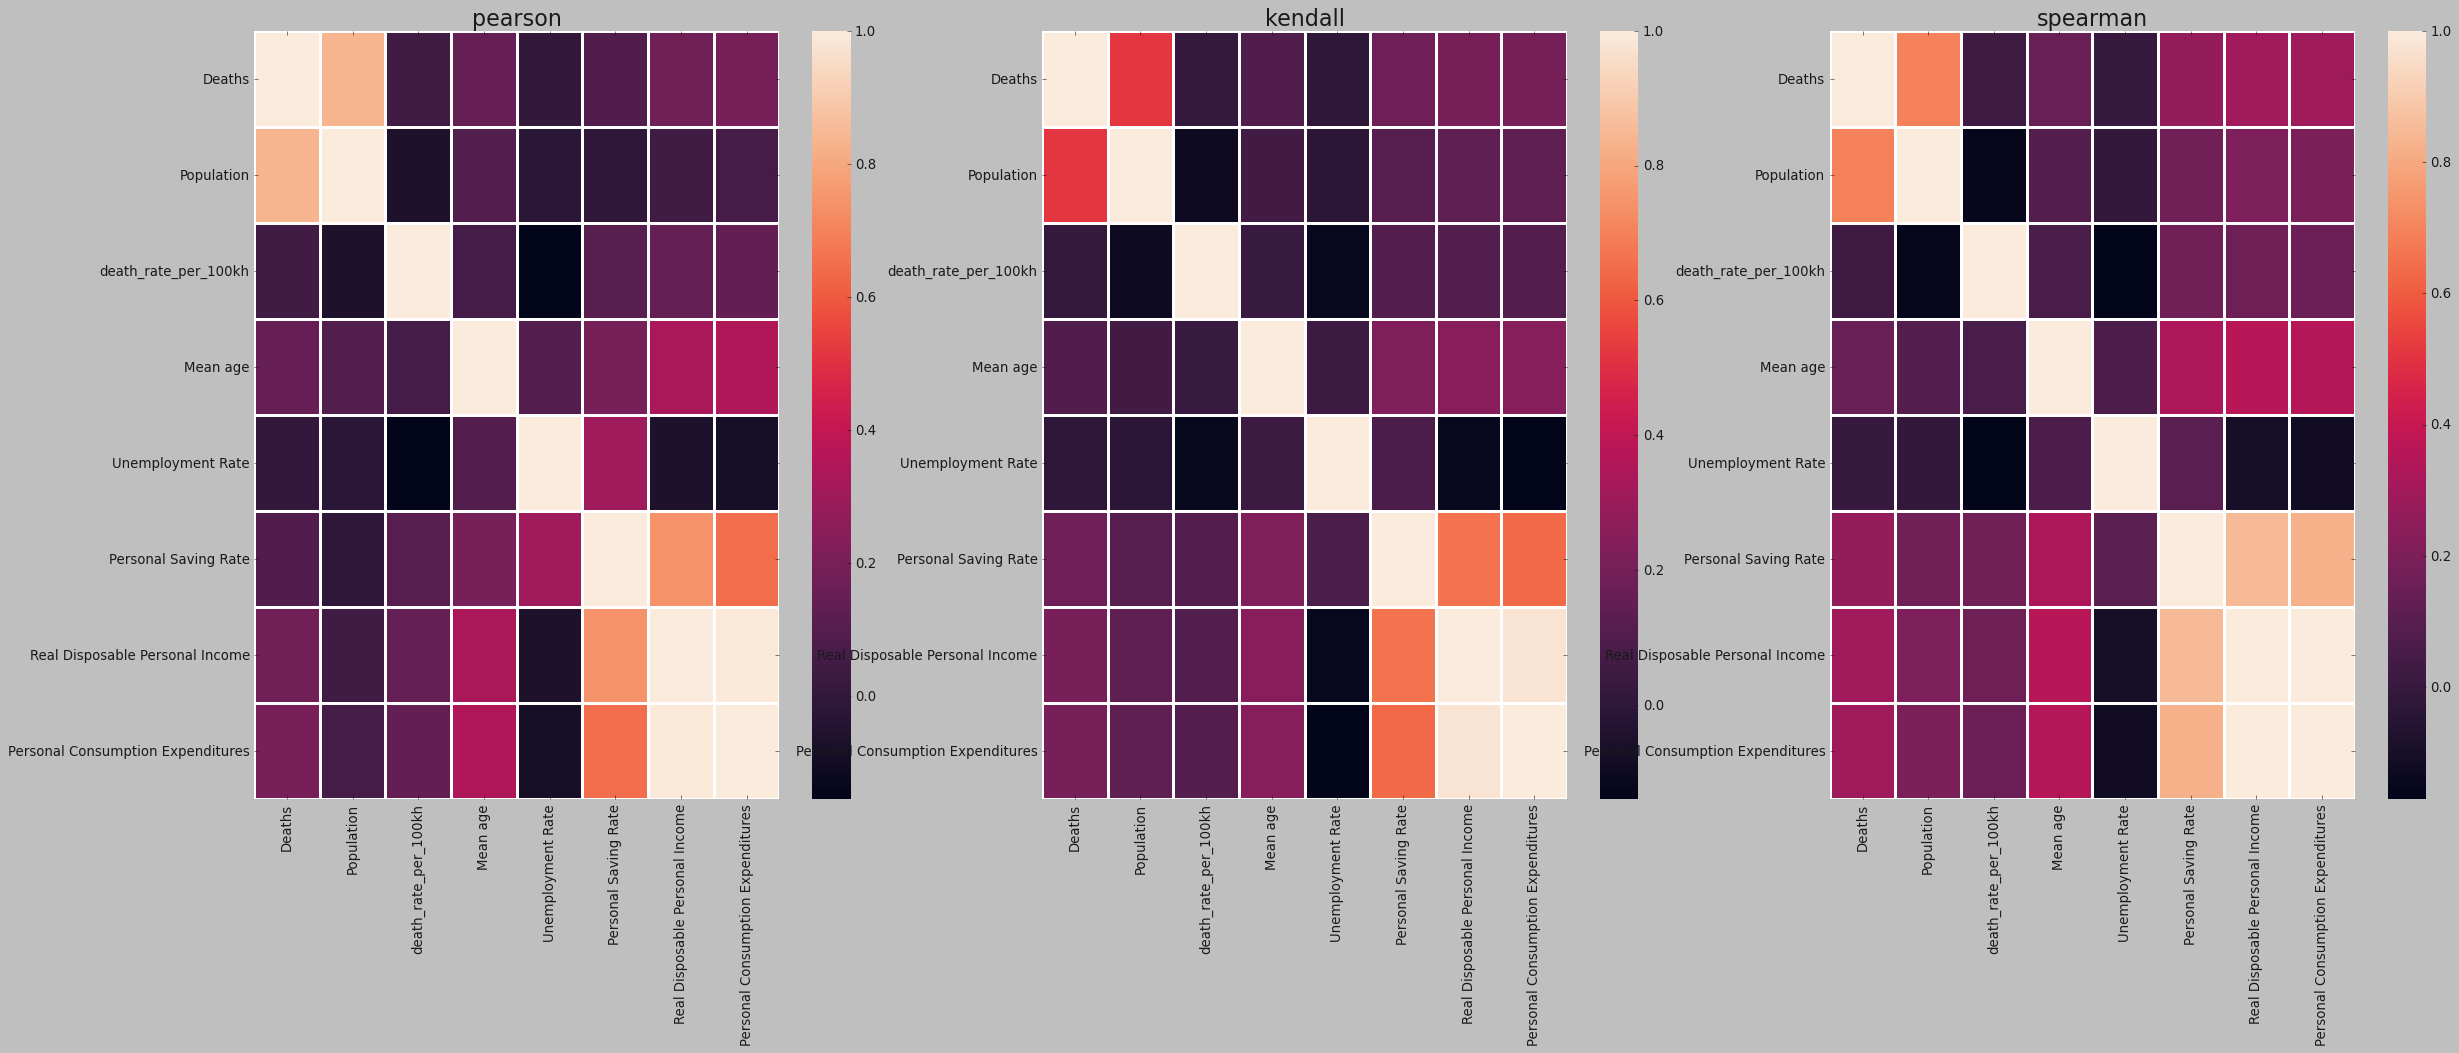

In [584]:
# Generación de los gráficos de correlación entre los 3 métodos: 

plt.figure(figsize=(36,12))

for j,i in enumerate(['pearson','kendall','spearman']):

    plt.subplot(1,3,j+1)
    correlation = full_df_with_economics_drop_cat.corr(method=i)
    sns.heatmap(correlation, linewidth = 1)
    plt.title(i, fontsize=20)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

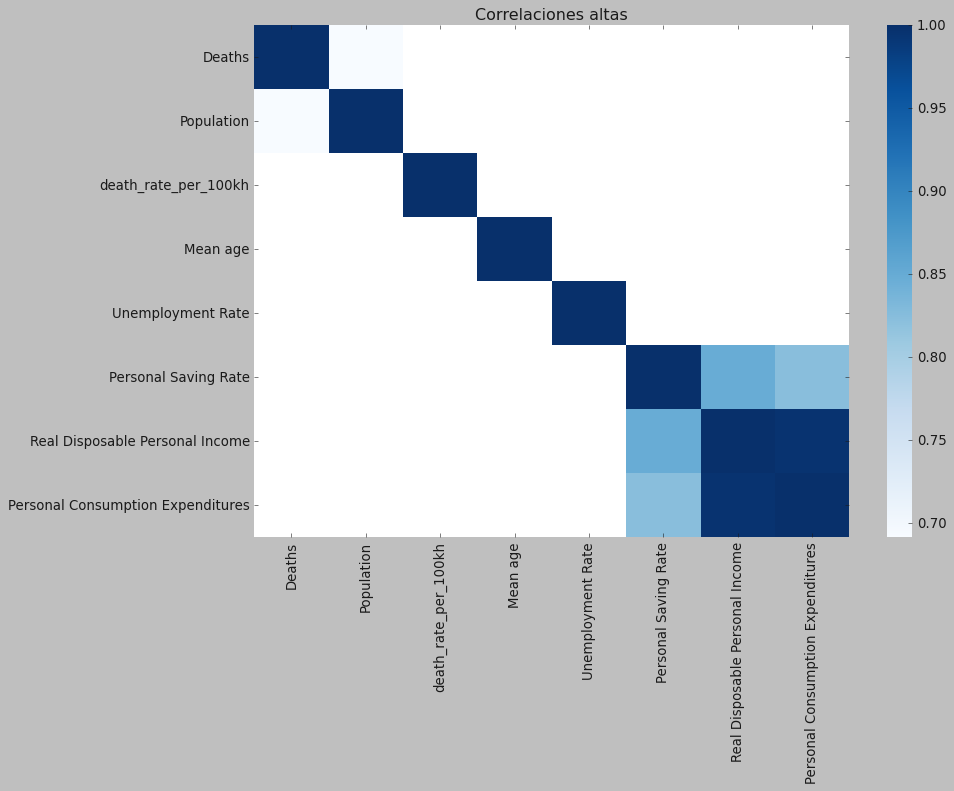

In [585]:
# Generación de un gráfico alternativo de correlación:

mat_corr_spearman = full_df_with_economics_drop_cat.corr('spearman')

high_corr = mat_corr_spearman[mat_corr_spearman>=.5]
plt.figure(figsize=(12,8))
sns.heatmap(high_corr, cmap="Blues")
plt.title('Correlaciones altas');

## Insight: 
Vemos que **Real Disposable Personal Income** y **Personal Consumption Expenditures** están **correlacionadas** con el **Personal Saving Rate**

<Figure size 1120x1120 with 0 Axes>

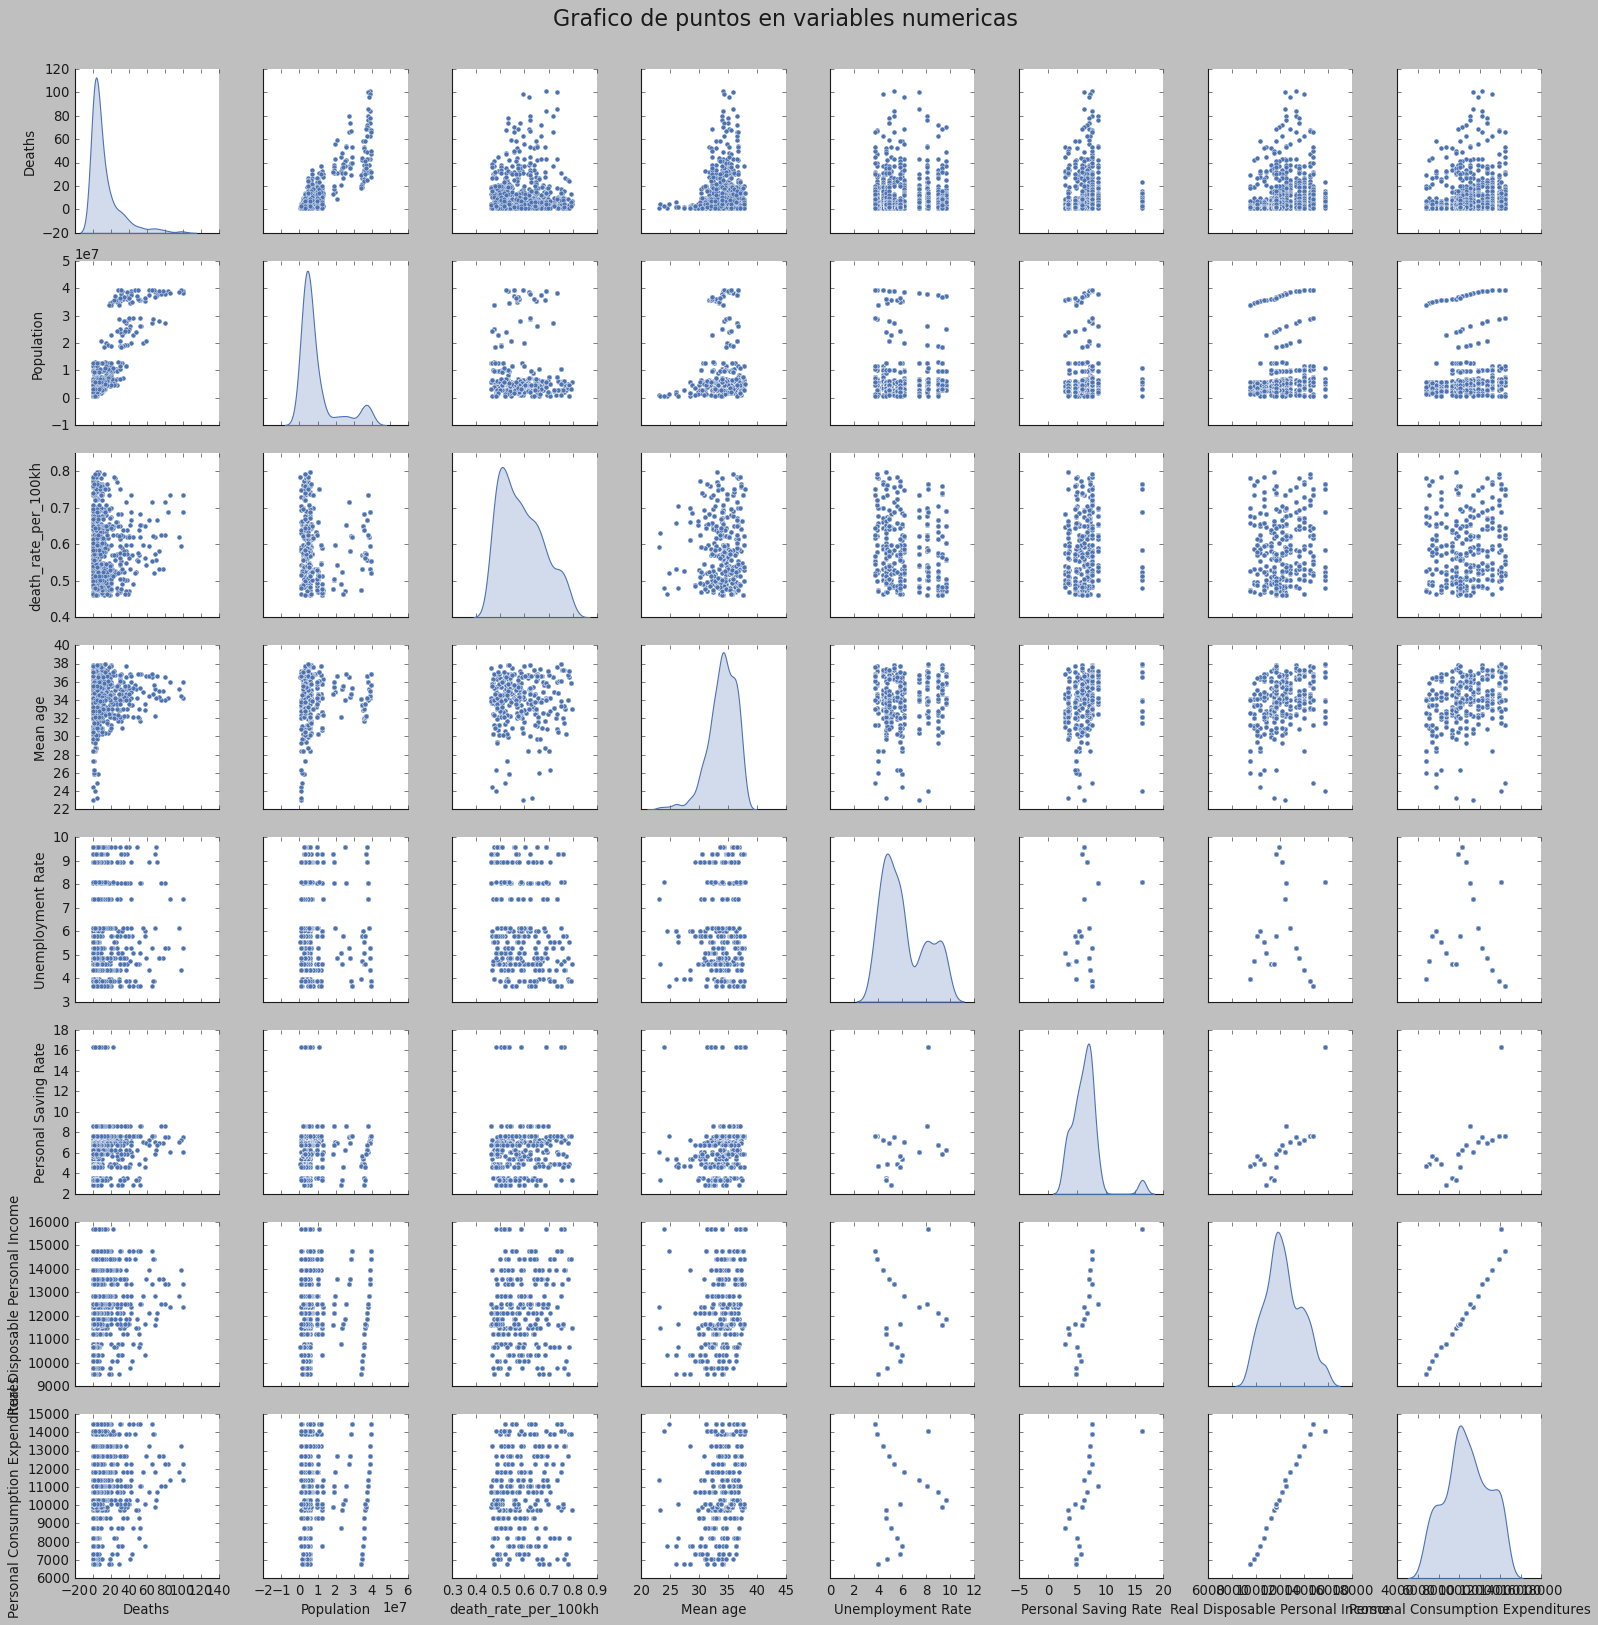

In [586]:
# Scatterplots e histogramas de variables numéricas
plt.figure(figsize=(14, 14))

g = sns.pairplot(full_df_with_economics_drop_cat[['Deaths', 'Population', 'death_rate_per_100kh', 'Mean age', 'Unemployment Rate','Personal Saving Rate','Real Disposable Personal Income','Personal Consumption Expenditures']], diag_kind='kde');
g.fig.suptitle("Grafico de puntos en variables numericas", fontsize=20, y=1.02);

## Insights
1. Vemos que **no hay correlaciones fuertes entre variables** y que la mayoría tienden a la normalidad. 
2. Muerte y población tienen **sesgo positivo**.
3. Unemployment rate parece ser **bimodal**.

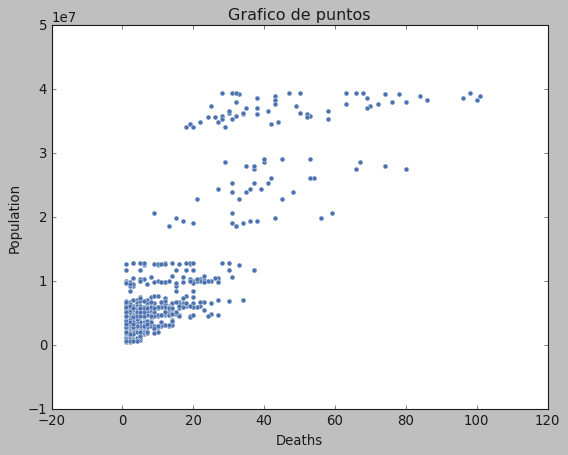

In [587]:
# Numérica vs numérica

sns.scatterplot(x = 'Deaths', y= 'Population', data=full_df_with_economics_drop_cat).set(title="Grafico de puntos");

## Insight:
No parece haber una correlación lineal entre población y muertes

C:\Users\Fabir\AppData\Local\Temp\ipykernel_20876\1157518698.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_year = join_states.groupby('Year')['deaths', 'Population'].sum().reset_index()


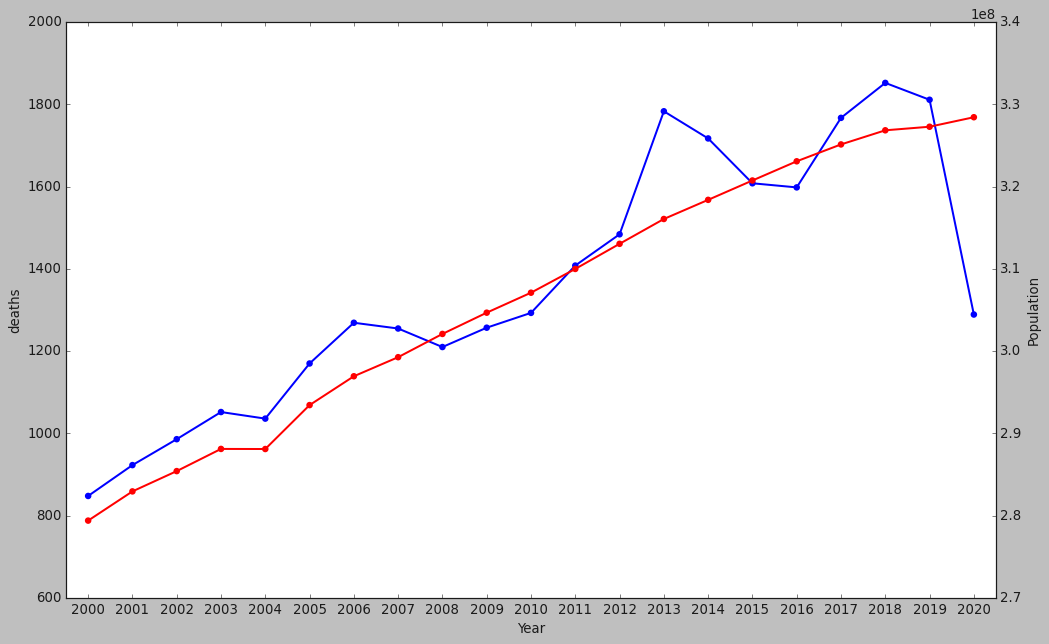

In [588]:
# Realizamos un gráfico de muertes y población con doble eje x

grouped_year = join_states.groupby('Year')['deaths', 'Population'].sum().reset_index()

plt.figure(figsize=(15, 9))

ax = sns.pointplot(x = 'Year', y = 'deaths', data=grouped_year, color = 'blue', label='Deaths')
ax2 = ax.twinx()
ax = sns.pointplot(x = 'Year', y = 'Population', data=grouped_year,  color = 'red', label='Population', ax=ax2)


## Insight: 
Podemos ver **cierta tendencia a la suba** tanto en población como en muertes, pero **no tienen el mismo comportamiento**.
Mientras que la población crece más linealmente, las muertes tienen picos y **una baja abrupta en 2020 (posiblemente por el lockdown)**

In [589]:
# Categórico vs numérico
# Tabla de frecuencia bivariada

pd.crosstab(full_df_final['Race'] , full_df_with_economics['Deaths'])

Deaths,1,2,3,4,5,6,7,8,9,10,...,25,27,28,30,31,32,36,38,45,52
Race,,,,,,,,,,,,,,,,,,,,,
African-American/Black,5,4,3,2,3,2,4,1,1,2,...,0,0,0,1,0,0,1,0,1,0
European-American/White,5,4,4,1,3,3,1,0,3,1,...,1,0,1,0,1,0,0,1,0,0
Hispanic/Latino,9,3,4,4,1,3,0,1,0,1,...,0,1,0,0,1,1,0,0,0,1


<AxesSubplot:xlabel='Race', ylabel='Deaths'>

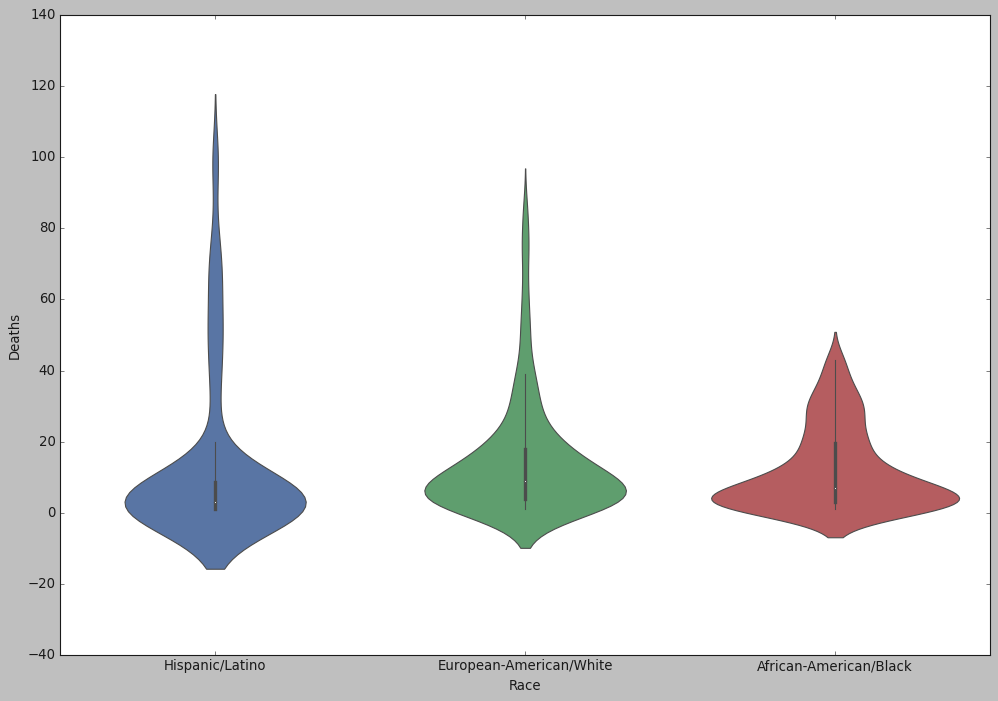

In [590]:
# Gráfico de violín 

plt.figure(figsize=(15,10))
sns.violinplot(x = 'Race', y='Deaths', data=full_df_final)

## Insights
En todas las etnias vemos una **acumulación en los valores bajos** pero **mayor dispersión en Hispanic/Latino y menor en African-American/Black**

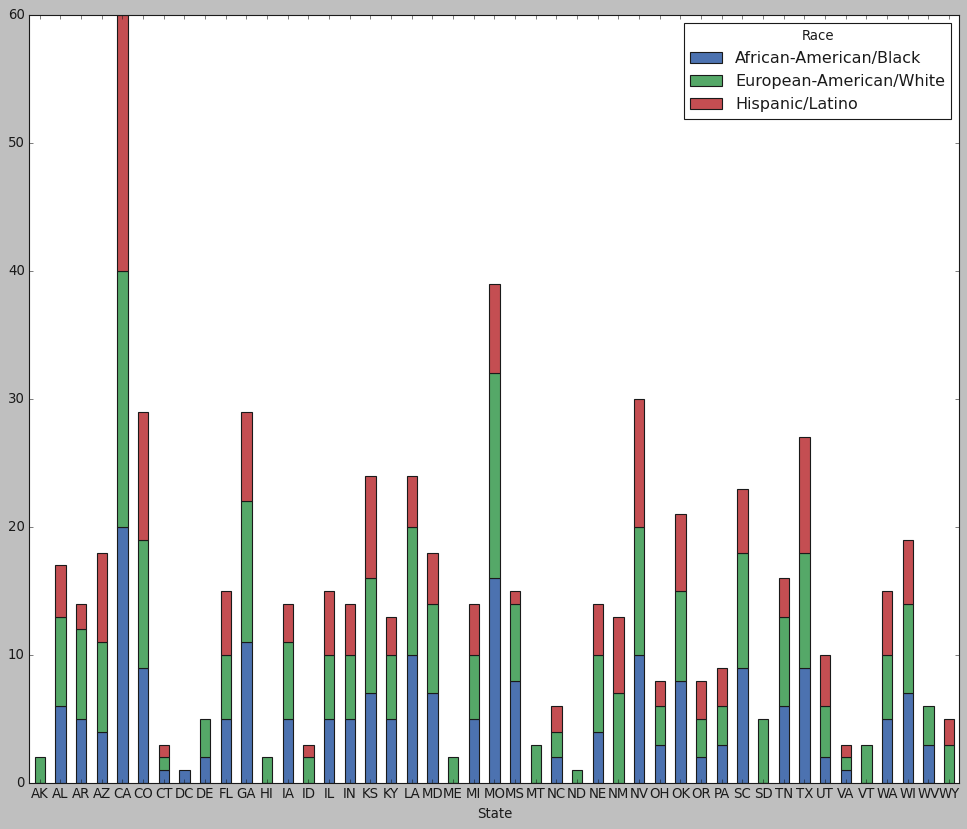

In [591]:
# Categórico vs categórico

cross = pd.crosstab(full_df_final['State'] , full_df_final['Race'])
cross.plot(kind="bar", stacked=True, rot=0, figsize=(15,12));

## Insight:
Vemos que California tiene **mayor población que los demás estados** y pareciera tener una **distribución equitativa de etnias** entre las víctimas de violencia policial

# ENTRENAMIENTO DEL MODELO

In [592]:
# Importamos las librerías para entrenar el modelo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [593]:
# Definimos X

x = full_df_with_economics.drop(columns=['Year','State','Deaths','death_rate_per_100kh'])
x

,Population,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
0,35827943,31.688596,0,0,1,4,5.083333,2.858333,10811.366667,8769.058333
1,35827943,31.688596,0,1,0,4,5.083333,2.858333,10811.366667,8769.058333
2,35827943,31.688596,1,0,0,4,5.083333,2.858333,10811.366667,8769.058333
3,22778123,32.182692,0,1,0,37,5.083333,2.858333,10811.366667,8769.058333
4,22778123,32.182692,0,0,1,37,5.083333,2.858333,10811.366667,8769.058333
...,...,...,...,...,...,...,...,...,...,...
630,5832655,32.120000,0,0,1,42,8.108333,16.308333,15677.350000,14047.550000
631,3249879,32.777778,0,1,0,38,8.108333,16.308333,15677.350000,14047.550000
632,3249879,32.777778,0,0,1,38,8.108333,16.308333,15677.350000,14047.550000
633,3249879,32.777778,1,0,0,38,8.108333,16.308333,15677.350000,14047.550000


In [594]:
# Definimos Y

y= full_df_with_economics.Deaths
y

0      53
1      32
2      28
3      45
4      33
       ..
630     3
631     7
632     3
633     1
634     3
Name: Deaths, Length: 635, dtype: int64

In [595]:
# Separamos la data en train y test

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [596]:
X_train

,Population,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures
573,4472345,36.590909,1,0,0,17,3.683333,7.641667,14755.633333,14428.683333
118,11665706,34.666667,0,0,1,30,4.350000,7.275000,13956.716667,13239.108333
4,22778123,32.182692,0,0,1,37,5.083333,2.858333,10811.366667,8769.058333
602,3668976,35.400000,0,1,0,31,5.800000,4.583333,11630.125000,10050.091667
486,2858266,34.071429,1,0,0,16,9.608333,6.233333,11861.325000,10260.266667
...,...,...,...,...,...,...,...,...,...,...
129,10275758,34.604651,0,1,0,25,4.350000,7.275000,13956.716667,13239.108333
144,6028186,33.640000,0,0,1,19,4.350000,7.275000,13956.716667,13239.108333
72,1652495,36.250000,0,0,1,13,5.275000,7.541667,13330.075000,12263.483333
235,5352637,32.961538,1,0,0,5,6.158333,7.050000,12821.783333,11847.725000


In [597]:
# Normalizamos

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)

X_test_scal = scaler.transform(X_test)


In [598]:
# Aplicamos el modelo de regresión lineal
lr = LinearRegression()

# Ajustamos el modelo con X_train y y_train
lr.fit(X_train_scal,y_train)

# Predecimos con X_test
y_test_pred = lr.predict(X_test_scal)

In [599]:
# Importamos y aplicamos las métricas 

from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_test_pred))
print("MSE",mean_squared_error(y_test,y_test_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_test_pred)))
r2 = r2_score(y_test,y_test_pred)
print("R2",r2)

# Antes de los cambios de normalización las métricas daban de la siguiente manera: 

# MAE 5.847700431871219
# MSE 65.61398509927882
# RMSE 8.100245990047389
# R2 0.7655496692741136

MAE 5.847700431871159
MSE 65.61398509927807
RMSE 8.100245990047343
R2 0.7655496692741163


Modelo: Regresión Lineal
R-Cuadrado en Train: 0.7404618769065314
R-Cuadrado en Test: 0.7655496692741163


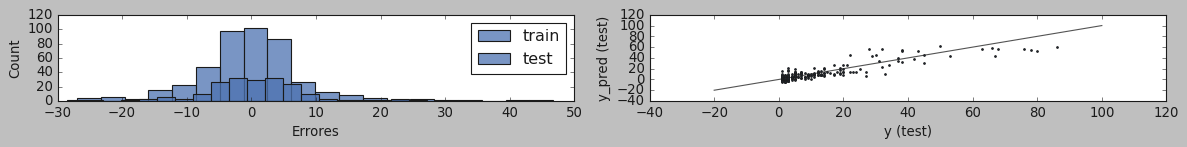

In [600]:
# Se observa un buen R2 para el modelo, procedemos a graficar los errores y la data con x train y x test

from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

y_train_pred = lr.predict(X_train_scal)
    
print(f'Modelo: Regresión Lineal')

r_train = metrics.r2_score(y_train, y_train_pred)
r_test = metrics.r2_score(y_test, y_test_pred)
print(f'R-Cuadrado en Train: {r_train}')
print(f'R-Cuadrado en Test: {r_test}')
    
plt.figure(figsize = (15,2))

plt.subplot(1,2,1)
sns.histplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.histplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()


In [601]:
# Obtenemos la fórmula y = b + wx

print(lr.intercept_) # Devuelve el valor b

13.360360360360374


In [602]:
# Obtenemos la fórmula y = b + wx

print(lr.coef_) # Devuelve los valores W

[ 14.720105     0.4775693   -0.95358641   1.49898279  -0.64212797
   0.58872577   0.10050056   2.20996077 -13.92990018  15.27150545]


# CONCLUSIÓN: 
El modelo ajusta correctamente (no parece haber underfitting u overfitting). Se ve un comportamiento en la misma dirección para la data predicha y la data de prueba. Si bien hay errores, el valor de R2 parece apoyar el modelo.

## Conclusión posterior a agregar el dataset de información  económica: 
El R2 mejoró y los errores disminuyeron. El comportamiento se mantiene como antes, es decir, no se observa underfitting u overfitting. 

# DESAFÍO CLASE 44 - EVALUANDO MODELOS DE ML

In [603]:
# Sumamos un dataset con la población por etnia de USA desde 1990 hasta 2019

df_USA_pop_by_race = pd.read_csv('pop_by_race.csv')
df_USA_pop_by_race

,IBRC_Geo_ID,Statefips,Countyfips,Description,Year,Total Population,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hawaiian or Pacific Islander Alone,Two or More Races,Not Hispanic,Hispanic
0,1000,1,0,AL,1990,4050055,2987764.0,1024198.0,16224.0,21869.0,NaN,NaN,4025948.0,24107.0
1,1000,1,0,AL,1991,4099156,3018779.0,1040280.0,17015.0,23082.0,NaN,NaN,4074144.0,25012.0
2,1000,1,0,AL,1992,4154014,3051680.0,1060627.0,17357.0,24350.0,NaN,NaN,4127269.0,26745.0
3,1000,1,0,AL,1993,4214202,3088449.0,1081479.0,18002.0,26272.0,NaN,NaN,4184665.0,29537.0
4,1000,1,0,AL,1994,4260229,3114389.0,1099593.0,18566.0,27681.0,NaN,NaN,4227077.0,33152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,72000,72,0,PR,2015,3473232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1536,72000,72,0,PR,2016,3406672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1537,72000,72,0,PR,2017,3325286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1538,72000,72,0,PR,2018,3193354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [604]:
# Dropeamos las columnas que no nos interesan para nuestro análisis. Renombramos Description por State para que sea más claro.

df_USA_pop_by_race_2 = df_USA_pop_by_race.drop(columns=['IBRC_Geo_ID','Statefips','Countyfips'])
df_USA_pop_by_race_2.rename(columns = {'Description':'State'}, inplace = True)
df_USA_pop_by_race_2


,State,Year,Total Population,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hawaiian or Pacific Islander Alone,Two or More Races,Not Hispanic,Hispanic
0,AL,1990,4050055,2987764.0,1024198.0,16224.0,21869.0,NaN,NaN,4025948.0,24107.0
1,AL,1991,4099156,3018779.0,1040280.0,17015.0,23082.0,NaN,NaN,4074144.0,25012.0
2,AL,1992,4154014,3051680.0,1060627.0,17357.0,24350.0,NaN,NaN,4127269.0,26745.0
3,AL,1993,4214202,3088449.0,1081479.0,18002.0,26272.0,NaN,NaN,4184665.0,29537.0
4,AL,1994,4260229,3114389.0,1099593.0,18566.0,27681.0,NaN,NaN,4227077.0,33152.0
...,...,...,...,...,...,...,...,...,...,...,...
1535,PR,2015,3473232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1536,PR,2016,3406672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1537,PR,2017,3325286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1538,PR,2018,3193354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [605]:
# Con el promedio de los últimos años creamos la data del año 2020

df_USA_pop_by_race_2020= df_USA_pop_by_race_2[(df_USA_pop_by_race_2['Year']  >= 2014)]
df_USA_pop_by_race_2020= df_USA_pop_by_race.groupby('Description').mean()
df_USA_pop_by_race_2020['Year']=2020
df_USA_pop_by_race_2020.reset_index(inplace=True)
df_USA_pop_by_race_2020 = df_USA_pop_by_race_2020.drop(columns=['IBRC_Geo_ID','Statefips','Countyfips'])
df_USA_pop_by_race_2020.rename(columns = {'Description':'State'}, inplace = True)
df_USA_pop_by_race_2020

,State,Year,Total Population,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hawaiian or Pacific Islander Alone,Two or More Races,Not Hispanic,Hispanic
0,AK,2020,6.643801e+05,4.671279e+05,2.515423e+04,103369.900000,3.380197e+04,7283.750,45105.50,6.304176e+05,3.396253e+04
1,AL,2020,4.561447e+06,3.248368e+06,1.196864e+06,26686.166667,4.533903e+04,4080.800,62204.75,4.440490e+06,1.209575e+05
2,AR,2020,2.753490e+06,2.232142e+06,4.335709e+05,21545.400000,3.001330e+04,6522.650,47805.75,2.625112e+06,1.283784e+05
3,AZ,2020,5.635483e+06,4.845924e+06,2.297780e+05,301983.233333,1.513729e+05,14994.650,144643.25,4.092321e+06,1.543162e+06
4,CA,2020,3.529555e+07,2.689033e+07,2.456864e+06,496164.533333,4.522691e+06,175352.400,1218900.15,2.311937e+07,1.217618e+07
5,CO,2020,4.601100e+06,4.125692e+06,1.971483e+05,62437.166667,1.257089e+05,8385.100,126786.25,3.740875e+06,8.602254e+05
6,CT,2020,3.468411e+06,2.931953e+06,3.619882e+05,13744.866667,1.142402e+05,3260.950,66467.05,3.070841e+06,3.975698e+05
7,DC,2020,6.073771e+05,2.319922e+05,3.428921e+05,2750.033333,1.995730e+04,749.700,13928.55,5.549202e+05,5.245693e+04
8,DE,2020,8.328432e+05,6.194249e+05,1.725651e+05,4350.066667,2.365853e+04,689.050,18577.75,7.792828e+05,5.356033e+04
9,FL,2020,1.734034e+07,1.390528e+07,2.746099e+06,74084.166667,3.864679e+05,18353.300,324261.10,1.387395e+07,3.466388e+06


In [606]:
# Hacemos Concat con la información del 2020

df_USA_pop_by_race_3=  pd.concat([df_USA_pop_by_race_2, df_USA_pop_by_race_2020], ignore_index=True)
df_USA_pop_by_race_3

,State,Year,Total Population,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hawaiian or Pacific Islander Alone,Two or More Races,Not Hispanic,Hispanic
0,AL,1990,4.050055e+06,2.987764e+06,1.024198e+06,16224.000000,21869.000000,NaN,NaN,4.025948e+06,24107.000000
1,AL,1991,4.099156e+06,3.018779e+06,1.040280e+06,17015.000000,23082.000000,NaN,NaN,4.074144e+06,25012.000000
2,AL,1992,4.154014e+06,3.051680e+06,1.060627e+06,17357.000000,24350.000000,NaN,NaN,4.127269e+06,26745.000000
3,AL,1993,4.214202e+06,3.088449e+06,1.081479e+06,18002.000000,26272.000000,NaN,NaN,4.184665e+06,29537.000000
4,AL,1994,4.260229e+06,3.114389e+06,1.099593e+06,18566.000000,27681.000000,NaN,NaN,4.227077e+06,33152.000000
...,...,...,...,...,...,...,...,...,...,...,...
1586,VT,2020,6.098801e+05,5.888586e+05,5.094167e+03,2257.000000,7115.133333,187.25,9645.65,6.022886e+05,7591.500000
1587,WA,2020,6.271248e+06,5.284360e+06,2.338376e+05,114299.000000,432882.833333,42357.25,266445.45,5.684364e+06,586883.533333
1588,WI,2020,5.474864e+06,4.915336e+06,3.336608e+05,54478.600000,113101.133333,2565.25,84866.55,5.220054e+06,254810.033333
1589,WV,2020,1.823308e+06,1.731211e+06,6.088167e+04,3483.700000,11292.666667,489.80,24168.55,1.805639e+06,17669.400000


In [607]:
# Filtramos los años que nos interesan y quitamos los records de Puerto Rico ya que no está incluido en nuestro análisis

df_USA_pop_by_race_filtered = df_USA_pop_by_race_3[(df_USA_pop_by_race_3['Year']  >= 2000) & (df_USA_pop_by_race_3['State']  != 'PR')]
df_USA_pop_by_race_filtered

,State,Year,Total Population,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hawaiian or Pacific Islander Alone,Two or More Races,Not Hispanic,Hispanic
10,AL,2000,4.452173e+06,3.196875e+06,1.161454e+06,23262.000000,32544.000000,1608.00,36430.00,4.375157e+06,77016.000000
11,AL,2001,4.467634e+06,3.201387e+06,1.167403e+06,24084.000000,33971.000000,1963.00,38826.00,4.381912e+06,85722.000000
12,AL,2002,4.480089e+06,3.204279e+06,1.171672e+06,24966.000000,35810.000000,2272.00,41090.00,4.385910e+06,94179.000000
13,AL,2003,4.503491e+06,3.215079e+06,1.178398e+06,25920.000000,37929.000000,2625.00,43540.00,4.400019e+06,103472.000000
14,AL,2004,4.530729e+06,3.227772e+06,1.186375e+06,26755.000000,40712.000000,2983.00,46132.00,4.417445e+06,113284.000000
...,...,...,...,...,...,...,...,...,...,...,...
1586,VT,2020,6.098801e+05,5.888586e+05,5.094167e+03,2257.000000,7115.133333,187.25,9645.65,6.022886e+05,7591.500000
1587,WA,2020,6.271248e+06,5.284360e+06,2.338376e+05,114299.000000,432882.833333,42357.25,266445.45,5.684364e+06,586883.533333
1588,WI,2020,5.474864e+06,4.915336e+06,3.336608e+05,54478.600000,113101.133333,2565.25,84866.55,5.220054e+06,254810.033333
1589,WV,2020,1.823308e+06,1.731211e+06,6.088167e+04,3483.700000,11292.666667,489.80,24168.55,1.805639e+06,17669.400000


In [608]:
#Creamos nuevas columnas

df_USA_pop_by_race_filtered['White_percentage']= ((df_USA_pop_by_race_filtered['White Alone'])/(df_USA_pop_by_race_filtered['Total Population']))
df_USA_pop_by_race_filtered['Black_percentage']= ((df_USA_pop_by_race_filtered['Black Alone'])/(df_USA_pop_by_race_filtered['Total Population']))
df_USA_pop_by_race_filtered['Indian_percentage']= ((df_USA_pop_by_race_filtered['American Indian or Alaskan Native'])/(df_USA_pop_by_race_filtered['Total Population']))
df_USA_pop_by_race_filtered['Asian_percentage']= ((df_USA_pop_by_race_filtered['Asian Alone'])/(df_USA_pop_by_race_filtered['Total Population']))
df_USA_pop_by_race_filtered['Islander_percentage']= ((df_USA_pop_by_race_filtered['Asian Alone'])/(df_USA_pop_by_race_filtered['Total Population']))
df_USA_pop_by_race_filtered['Hispanic_percentage']= ((df_USA_pop_by_race_filtered['Hispanic'])/(df_USA_pop_by_race_filtered['Total Population']))
df_USA_pop_by_race_filtered['Two_more_races_percentage']= ((df_USA_pop_by_race_filtered['Two or More Races'])/(df_USA_pop_by_race_filtered['Total Population']))
df_USA_pop_by_race_filtered

C:\Users\Fabir\AppData\Local\Temp\ipykernel_20876\1147198163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_pop_by_race_filtered['White_percentage']= ((df_USA_pop_by_race_filtered['White Alone'])/(df_USA_pop_by_race_filtered['Total Population']))
C:\Users\Fabir\AppData\Local\Temp\ipykernel_20876\1147198163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_pop_by_race_filtered['Black_percentage']= ((df_USA_pop_by_race_filtered['Black Alone'])/(df_USA_pop_by_race_filtered['Total Populatio

,State,Year,Total Population,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hawaiian or Pacific Islander Alone,Two or More Races,Not Hispanic,Hispanic,White_percentage,Black_percentage,Indian_percentage,Asian_percentage,Islander_percentage,Hispanic_percentage,Two_more_races_percentage
10,AL,2000,4.452173e+06,3.196875e+06,1.161454e+06,23262.000000,32544.000000,1608.00,36430.00,4.375157e+06,77016.000000,0.718048,0.260874,0.005225,0.007310,0.007310,0.017299,0.008183
11,AL,2001,4.467634e+06,3.201387e+06,1.167403e+06,24084.000000,33971.000000,1963.00,38826.00,4.381912e+06,85722.000000,0.716573,0.261302,0.005391,0.007604,0.007604,0.019187,0.008691
12,AL,2002,4.480089e+06,3.204279e+06,1.171672e+06,24966.000000,35810.000000,2272.00,41090.00,4.385910e+06,94179.000000,0.715227,0.261529,0.005573,0.007993,0.007993,0.021022,0.009172
13,AL,2003,4.503491e+06,3.215079e+06,1.178398e+06,25920.000000,37929.000000,2625.00,43540.00,4.400019e+06,103472.000000,0.713908,0.261663,0.005756,0.008422,0.008422,0.022976,0.009668
14,AL,2004,4.530729e+06,3.227772e+06,1.186375e+06,26755.000000,40712.000000,2983.00,46132.00,4.417445e+06,113284.000000,0.712418,0.261851,0.005905,0.008986,0.008986,0.025003,0.010182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,VT,2020,6.098801e+05,5.888586e+05,5.094167e+03,2257.000000,7115.133333,187.25,9645.65,6.022886e+05,7591.500000,0.965532,0.008353,0.003701,0.011666,0.011666,0.012448,0.015816
1587,WA,2020,6.271248e+06,5.284360e+06,2.338376e+05,114299.000000,432882.833333,42357.25,266445.45,5.684364e+06,586883.533333,0.842633,0.037287,0.018226,0.069027,0.069027,0.093583,0.042487
1588,WI,2020,5.474864e+06,4.915336e+06,3.336608e+05,54478.600000,113101.133333,2565.25,84866.55,5.220054e+06,254810.033333,0.897800,0.060944,0.009951,0.020658,0.020658,0.046542,0.015501
1589,WV,2020,1.823308e+06,1.731211e+06,6.088167e+04,3483.700000,11292.666667,489.80,24168.55,1.805639e+06,17669.400000,0.949489,0.033391,0.001911,0.006194,0.006194,0.009691,0.013255


In [609]:
df_USA_pop_by_race_filtered.describe()

,Year,Total Population,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hawaiian or Pacific Islander Alone,Two or More Races,Not Hispanic,Hispanic,White_percentage,Black_percentage,Indian_percentage,Asian_percentage,Islander_percentage,Hispanic_percentage,Two_more_races_percentage
count,1070.000000,1.070000e+03,1.070000e+03,1.070000e+03,1070.000000,1.070000e+03,1070.000000,1.070000e+03,1.070000e+03,1.070000e+03,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,2009.990654,6.002352e+06,4.714299e+06,7.826388e+05,69270.138318,2.947869e+05,12786.948294,1.308156e+05,5.046480e+06,9.558716e+05,0.801005,0.114570,0.018802,0.037849,0.037849,0.102393,0.024682
std,6.053233,6.739333e+06,5.150807e+06,9.379215e+05,101818.169812,7.275367e+05,30471.459918,1.883249e+05,4.762824e+06,2.315508e+06,0.134064,0.111284,0.029943,0.056575,0.056575,0.097329,0.030199
min,2000.000000,4.943000e+05,1.971410e+05,2.797000e+03,1974.000000,2.931000e+03,149.000000,5.797000e+03,4.617010e+05,5.556000e+03,0.255190,0.003095,0.001641,0.005386,0.005386,0.006833,0.005594
25%,2005.000000,1.636099e+06,1.531421e+06,6.310650e+04,17360.000000,3.078275e+04,1806.250000,3.063150e+04,1.308618e+06,9.648400e+04,0.736872,0.032366,0.004346,0.014069,0.014069,0.038072,0.014389
50%,2010.000000,4.214329e+06,3.137221e+06,3.246135e+05,32873.000000,8.646050e+04,3947.500000,7.824700e+04,3.905696e+06,2.627825e+05,0.831778,0.076818,0.006771,0.023374,0.023374,0.072494,0.018436
75%,2015.000000,6.828537e+06,5.613015e+06,1.346795e+06,69688.000000,2.761455e+05,9064.500000,1.624845e+05,6.174788e+06,6.607908e+05,0.891456,0.157729,0.015375,0.040701,0.040701,0.120677,0.023864
max,2020.000000,3.951222e+07,2.851894e+07,3.739221e+06,649862.000000,6.110945e+06,199805.000000,1.574115e+06,2.400416e+07,1.557488e+07,0.972592,0.610465,0.157543,0.470662,0.470662,0.492621,0.241751


In [610]:
df_USA_pop_by_race_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 10 to 1590
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               1070 non-null   object 
 1   Year                                1070 non-null   int64  
 2   Total Population                    1070 non-null   float64
 3   White Alone                         1070 non-null   float64
 4   Black Alone                         1070 non-null   float64
 5   American Indian or Alaskan Native   1070 non-null   float64
 6   Asian Alone                         1070 non-null   float64
 7   Hawaiian or Pacific Islander Alone  1070 non-null   float64
 8   Two or More Races                   1070 non-null   float64
 9   Not Hispanic                        1070 non-null   float64
 10  Hispanic                            1070 non-null   float64
 11  White_percentage                    1070 n

In [611]:
# Joineamos la tabla con el dataframe completo con el que veníamos trabajando

full_df_with_eco_race = pd.merge(full_df_with_economics, df_USA_pop_by_race_filtered, on=['Year', 'State'], how='inner')
full_df_with_eco_race

,Year,State,Deaths,Population,death_rate_per_100kh,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,...,Two or More Races,Not Hispanic,Hispanic,White_percentage,Black_percentage,Indian_percentage,Asian_percentage,Islander_percentage,Hispanic_percentage,Two_more_races_percentage
0,2005,CA,53,35827943,0.683824,31.688596,0,0,1,4,...,1012389.00,2.320811e+07,1.261983e+07,0.760300,0.067973,0.013657,0.125321,0.125321,0.352234,0.028257
1,2005,CA,32,35827943,0.683824,31.688596,0,1,0,4,...,1012389.00,2.320811e+07,1.261983e+07,0.760300,0.067973,0.013657,0.125321,0.125321,0.352234,0.028257
2,2005,CA,28,35827943,0.683824,31.688596,1,0,0,4,...,1012389.00,2.320811e+07,1.261983e+07,0.760300,0.067973,0.013657,0.125321,0.125321,0.352234,0.028257
3,2005,TX,45,22778123,0.491700,32.182692,0,1,0,37,...,288914.00,1.476738e+07,8.010747e+06,0.825706,0.118367,0.007977,0.034163,0.034163,0.351686,0.012684
4,2005,TX,33,22778123,0.491700,32.182692,0,0,1,37,...,288914.00,1.476738e+07,8.010747e+06,0.825706,0.118367,0.007977,0.034163,0.034163,0.351686,0.012684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2020,WI,3,5832655,0.514346,32.120000,0,0,1,42,...,84866.55,5.220054e+06,2.548100e+05,0.897800,0.060944,0.009951,0.020658,0.020658,0.046542,0.015501
606,2020,UT,7,3249879,0.584637,32.777778,0,1,0,38,...,55784.65,2.202158e+06,2.685779e+05,0.930395,0.011026,0.014693,0.022085,0.022085,0.108704,0.022578
607,2020,UT,3,3249879,0.584637,32.777778,0,0,1,38,...,55784.65,2.202158e+06,2.685779e+05,0.930395,0.011026,0.014693,0.022085,0.022085,0.108704,0.022578
608,2020,UT,1,3249879,0.584637,32.777778,1,0,0,38,...,55784.65,2.202158e+06,2.685779e+05,0.930395,0.011026,0.014693,0.022085,0.022085,0.108704,0.022578


## REENTRENAMIENTO DEL MODELO CON LOS NUEVOS DATOS

In [612]:
# Definimos X

full_df_with_eco_race = pd.merge(full_df_with_economics, df_USA_pop_by_race_filtered, on=['Year', 'State'], how='inner')
full_df_with_eco_race

x2 = full_df_with_eco_race.drop(columns=['Year','State','Deaths','death_rate_per_100kh','Hispanic','Not Hispanic','Two or More Races','Hawaiian or Pacific Islander Alone','Asian Alone','American Indian or Alaskan Native','White Alone','Black Alone','Population'])
x2


,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures,Total Population,White_percentage,Black_percentage,Indian_percentage,Asian_percentage,Islander_percentage,Hispanic_percentage,Two_more_races_percentage
0,31.688596,0,0,1,4,5.083333,2.858333,10811.366667,8769.058333,3.582794e+07,0.760300,0.067973,0.013657,0.125321,0.125321,0.352234,0.028257
1,31.688596,0,1,0,4,5.083333,2.858333,10811.366667,8769.058333,3.582794e+07,0.760300,0.067973,0.013657,0.125321,0.125321,0.352234,0.028257
2,31.688596,1,0,0,4,5.083333,2.858333,10811.366667,8769.058333,3.582794e+07,0.760300,0.067973,0.013657,0.125321,0.125321,0.352234,0.028257
3,32.182692,0,1,0,37,5.083333,2.858333,10811.366667,8769.058333,2.277812e+07,0.825706,0.118367,0.007977,0.034163,0.034163,0.351686,0.012684
4,32.182692,0,0,1,37,5.083333,2.858333,10811.366667,8769.058333,2.277812e+07,0.825706,0.118367,0.007977,0.034163,0.034163,0.351686,0.012684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,32.120000,0,0,1,42,8.108333,16.308333,15677.350000,14047.550000,5.474864e+06,0.897800,0.060944,0.009951,0.020658,0.020658,0.046542,0.015501
606,32.777778,0,1,0,38,8.108333,16.308333,15677.350000,14047.550000,2.470736e+06,0.930395,0.011026,0.014693,0.022085,0.022085,0.108704,0.022578
607,32.777778,0,0,1,38,8.108333,16.308333,15677.350000,14047.550000,2.470736e+06,0.930395,0.011026,0.014693,0.022085,0.022085,0.108704,0.022578
608,32.777778,1,0,0,38,8.108333,16.308333,15677.350000,14047.550000,2.470736e+06,0.930395,0.011026,0.014693,0.022085,0.022085,0.108704,0.022578


In [613]:
# Definimos Y

y2= full_df_with_eco_race.Deaths
y2


0      53
1      32
2      28
3      45
4      33
       ..
605     3
606     7
607     3
608     1
609     3
Name: Deaths, Length: 610, dtype: int64

In [614]:
# Separamos la data en train y test

X_train,X_test,y_train,y_test = train_test_split(x2,y2,test_size=0.3,random_state=1)

In [615]:
X_train

,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures,Total Population,White_percentage,Black_percentage,Indian_percentage,Asian_percentage,Islander_percentage,Hispanic_percentage,Two_more_races_percentage
133,33.640000,0,0,1,19,4.350000,7.275000,13956.716667,13239.108333,6023868.0,0.590667,0.308143,0.005904,0.065854,0.065854,0.100712,0.028350
595,37.782609,0,1,0,34,8.108333,16.308333,15677.350000,14047.550000,4294169.1,0.684819,0.288180,0.004321,0.011950,0.011950,0.036630,0.015242
588,35.538462,0,1,0,28,5.800000,4.583333,11630.125000,10050.091667,2010662.0,0.839326,0.023145,0.100901,0.014553,0.014553,0.455852,0.020616
161,32.406250,0,1,0,3,4.608333,3.558333,11226.591667,9277.250000,6029141.0,0.861836,0.039083,0.051135,0.025898,0.025898,0.282289,0.019840
359,35.846154,0,1,0,5,8.075000,8.566667,12504.433333,11047.341667,5192647.0,0.881454,0.043404,0.015577,0.030286,0.030286,0.209620,0.027509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,35.060606,0,1,0,42,4.350000,7.275000,13956.716667,13239.108333,5790186.0,0.872376,0.066912,0.011585,0.029450,0.029450,0.067981,0.019116
144,32.970874,0,1,0,4,4.608333,3.558333,11226.591667,9277.250000,36021202.0,0.756297,0.067667,0.014166,0.127829,0.127829,0.357459,0.029468
72,36.275862,0,0,1,33,7.358333,6.125000,12350.075000,11363.533333,12776309.0,0.830955,0.115681,0.003416,0.031524,0.031524,0.063480,0.017786
235,33.333333,0,1,0,8,6.158333,7.050000,12821.783333,11847.725000,932487.0,0.707246,0.223324,0.006403,0.037407,0.037407,0.087283,0.024748


In [616]:
# Normalizamos

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)

X_test_scal = scaler.transform(X_test)

In [617]:
# Aplicamos el modelo de regresión lineal
lr = LinearRegression()

# Ajustamos el modelo con X_train y y_train
lr.fit(X_train_scal,y_train)

# Predecimos con X_test
y_test_pred = lr.predict(X_test_scal)

In [618]:
# Aplicamos las métricas 

print("MAE",mean_absolute_error(y_test,y_test_pred))
print("MSE",mean_squared_error(y_test,y_test_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_test_pred)))
r2 = r2_score(y_test,y_test_pred)
print("R2",r2)

MAE 5.8097040213568985
MSE 86.7567633525081
RMSE 9.314331073808152
R2 0.7305976883423682


Modelo: Regresión Lineal
R-Cuadrado en Train: 0.7611263717940303
R-Cuadrado en Test: 0.7305976883423682


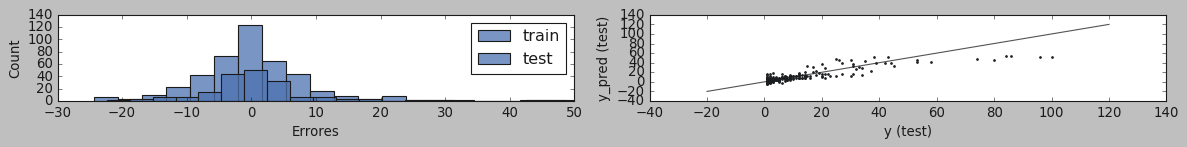

In [619]:
# Graficamos los errores y la data con x train y x test

y_train_pred = lr.predict(X_train_scal)
    
print(f'Modelo: Regresión Lineal')

r_train = metrics.r2_score(y_train, y_train_pred)
r_test = metrics.r2_score(y_test, y_test_pred)
print(f'R-Cuadrado en Train: {r_train}')
print(f'R-Cuadrado en Test: {r_test}')
    
plt.figure(figsize = (15,2))

plt.subplot(1,2,1)
sns.histplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.histplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [620]:
# Obtenemos la fórmula y = b + wx

print(lr.intercept_) # Devuelve el valor b

13.639344262295094


In [621]:
# Obtenemos la fórmula y = b + wx

print(lr.coef_) # Devuelve los valores W

[ -0.02928855  -0.75685129   1.2063082   -0.51953237   0.47324912
   0.13939149   2.4355948  -11.31207428  12.00783572  15.54832266
 -15.17327229 -14.65953915  -4.56752681  -5.05602755  -5.05602755
   2.25536554  -0.10534393]


## CONCLUSIÓN

Las métricas empeoraron respecto del modelo anterior, especialmente el MSE y el R2 bajó tres décimas

Modelo 1:<br>
MAE 5.847700431871219<br>
MSE 65.61398509927882<br>
RMSE 8.100245990047389<br>
R2 0.7655496692741136<br>
<br><br>
Modelo 2 (se suma data económica):<br>
MAE 5.847700431871159<br>
MSE 65.61398509927807<br>
RMSE 8.100245990047343<br>
R2 0.7655496692741163<br>
<br><br>
Modelo 3 (se sumaron los porcentajes de etnias de la población):<br>
MAE 5.8097040213568985<br>
MSE 86.7567633525081<br>
RMSE 9.314331073808152<br>
R2 0.7305976883423682<br>
<br><br>

## DESAFÍO FEATURE SELECTION - CLASE 46

In [622]:
# Dropeamos las columnas redundantes que causaran un alto error en el modelo anterior

full_df_with_eco_race2 = full_df_with_eco_race.drop(columns=['Year','State','death_rate_per_100kh','Hispanic','Not Hispanic','Two or More Races','Hawaiian or Pacific Islander Alone','Asian Alone','American Indian or Alaskan Native','White Alone','Black Alone','Total Population'])
full_df_with_eco_race2

,Deaths,Population,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures,White_percentage,Black_percentage,Indian_percentage,Asian_percentage,Islander_percentage,Hispanic_percentage,Two_more_races_percentage
0,53,35827943,31.688596,0,0,1,4,5.083333,2.858333,10811.366667,8769.058333,0.760300,0.067973,0.013657,0.125321,0.125321,0.352234,0.028257
1,32,35827943,31.688596,0,1,0,4,5.083333,2.858333,10811.366667,8769.058333,0.760300,0.067973,0.013657,0.125321,0.125321,0.352234,0.028257
2,28,35827943,31.688596,1,0,0,4,5.083333,2.858333,10811.366667,8769.058333,0.760300,0.067973,0.013657,0.125321,0.125321,0.352234,0.028257
3,45,22778123,32.182692,0,1,0,37,5.083333,2.858333,10811.366667,8769.058333,0.825706,0.118367,0.007977,0.034163,0.034163,0.351686,0.012684
4,33,22778123,32.182692,0,0,1,37,5.083333,2.858333,10811.366667,8769.058333,0.825706,0.118367,0.007977,0.034163,0.034163,0.351686,0.012684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,3,5832655,32.120000,0,0,1,42,8.108333,16.308333,15677.350000,14047.550000,0.897800,0.060944,0.009951,0.020658,0.020658,0.046542,0.015501
606,7,3249879,32.777778,0,1,0,38,8.108333,16.308333,15677.350000,14047.550000,0.930395,0.011026,0.014693,0.022085,0.022085,0.108704,0.022578
607,3,3249879,32.777778,0,0,1,38,8.108333,16.308333,15677.350000,14047.550000,0.930395,0.011026,0.014693,0.022085,0.022085,0.108704,0.022578
608,1,3249879,32.777778,1,0,0,38,8.108333,16.308333,15677.350000,14047.550000,0.930395,0.011026,0.014693,0.022085,0.022085,0.108704,0.022578


In [623]:
# Realizamos el cálculo de correlación de nuestras variables

full_df_with_eco_race2.corr()

,Deaths,Population,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures,White_percentage,Black_percentage,Indian_percentage,Asian_percentage,Islander_percentage,Hispanic_percentage,Two_more_races_percentage
Deaths,1.000000,0.836765,0.139343,-0.050590,0.054300,-0.006357,-0.216517,0.000776,0.090631,0.174943,0.192288,-0.183702,-0.038817,-0.125785,0.547984,0.547984,0.599379,0.127378
Population,0.836765,1.000000,0.079885,0.022526,-0.082979,0.067390,-0.304865,-0.019735,-0.014224,0.036193,0.046725,-0.204528,-0.062183,-0.142980,0.665097,0.665097,0.687792,0.119522
Mean age,0.139343,0.079885,1.000000,0.043555,-0.060387,0.020446,0.073811,0.097899,0.225993,0.332826,0.345488,-0.023277,0.095122,-0.190246,-0.043075,-0.043075,-0.008970,-0.047811
Race_African-American/Black,-0.050590,0.022526,0.043555,1.000000,-0.568320,-0.428824,-0.012384,0.015428,0.033011,0.035645,0.034417,-0.073684,0.109972,-0.117489,-0.011243,-0.011243,-0.060495,-0.037255
Race_European-American/White,0.054300,-0.082979,-0.060387,-0.568320,1.000000,-0.499605,0.020540,0.000058,0.008658,-0.007881,-0.011812,0.030607,-0.042246,0.080198,-0.027450,-0.027450,-0.063410,0.023411
Race_Hispanic/Latino,-0.006357,0.067390,0.020446,-0.428824,-0.499605,1.000000,-0.009514,-0.016306,-0.044260,-0.028874,-0.023265,0.043971,-0.069395,0.035640,0.041975,0.041975,0.133309,0.013519
State_label_encoded,-0.216517,-0.304865,0.073811,-0.012384,0.020540,-0.009514,1.000000,0.002943,0.074483,0.087812,0.083826,0.218797,-0.111073,0.083503,-0.271539,-0.271539,-0.224199,-0.037297
Unemployment Rate,0.000776,-0.019735,0.097899,0.015428,0.000058,-0.016306,0.002943,1.000000,0.285784,-0.098483,-0.114979,0.030351,0.005438,-0.008573,-0.058893,-0.058893,-0.006666,-0.030984
Personal Saving Rate,0.090631,-0.014224,0.225993,0.033011,0.008658,-0.044260,0.074483,0.285784,1.000000,0.736042,0.648048,0.030663,0.022198,-0.124109,-0.040538,-0.040538,-0.073151,0.019050
Real Disposable Personal Income,0.174943,0.036193,0.332826,0.035645,-0.007881,-0.028874,0.087812,-0.098483,0.736042,1.000000,0.987475,-0.043808,0.098763,-0.169969,-0.029170,-0.029170,-0.065185,0.022483


<Figure size 1120x1120 with 0 Axes>

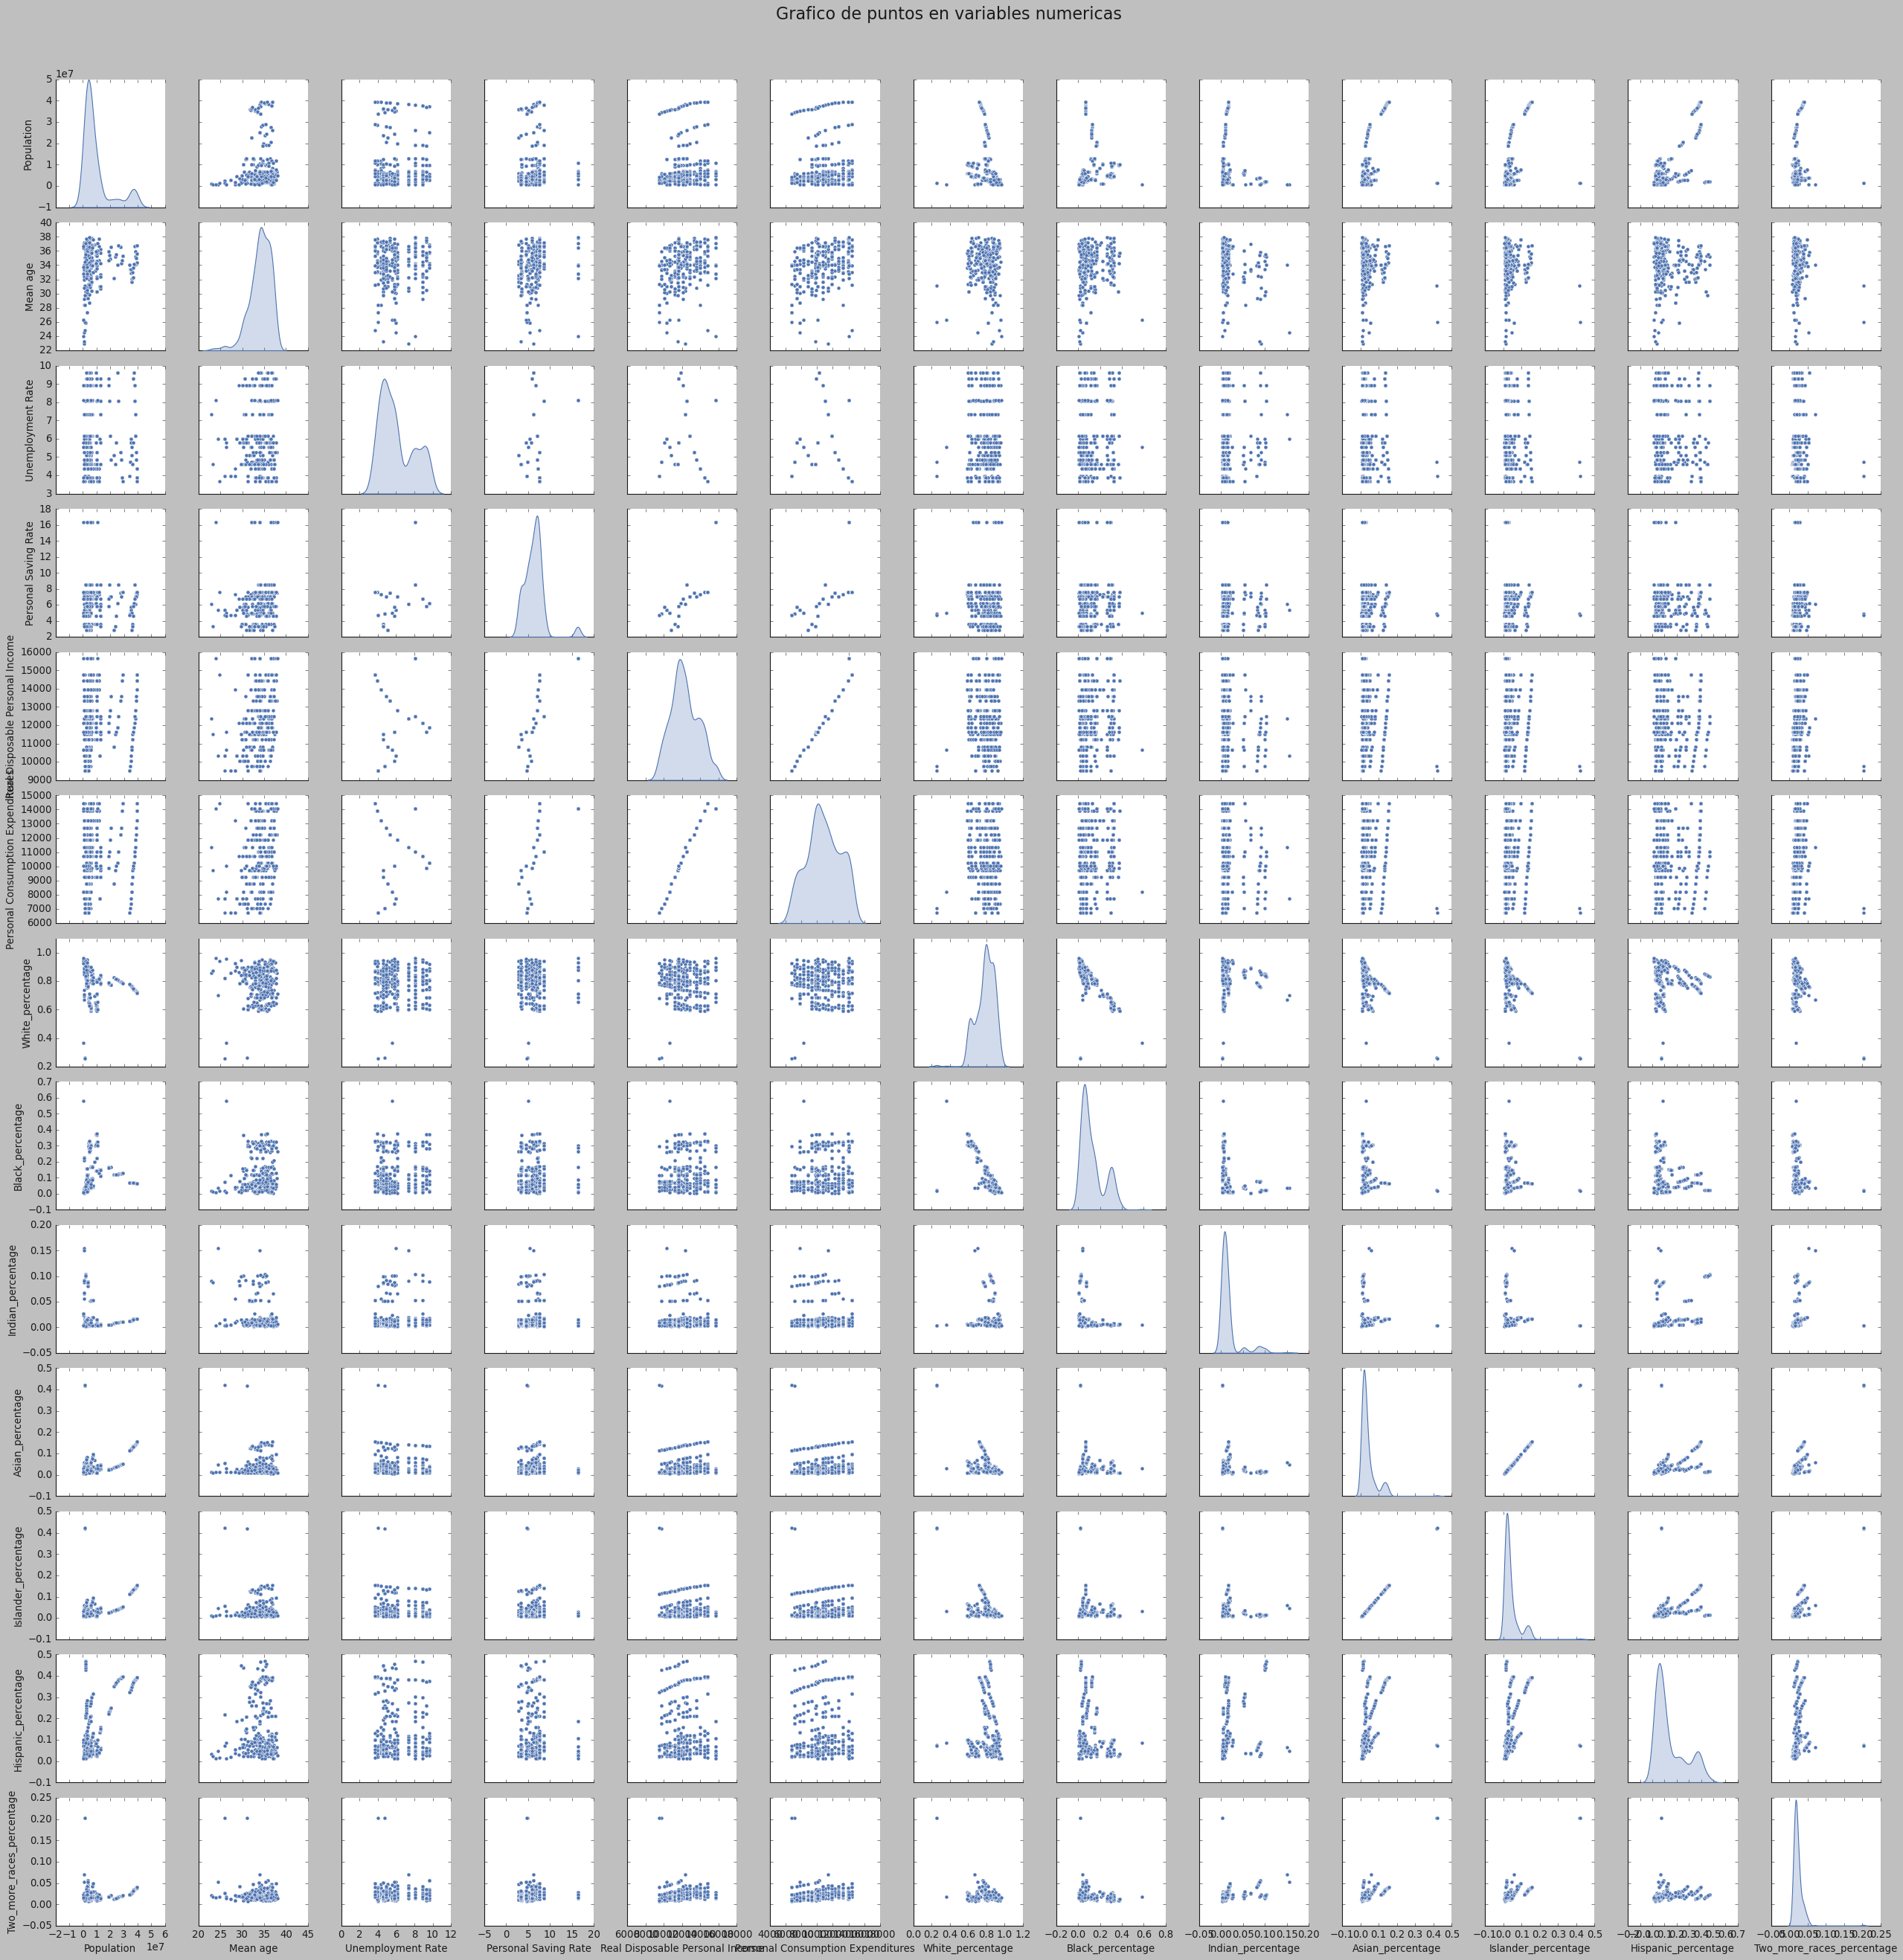

In [624]:
# Scatterplots e histogramas de variables numéricas
plt.figure(figsize=(14, 14))

g = sns.pairplot(full_df_with_eco_race2[['Population', 'Mean age', 'Unemployment Rate','Personal Saving Rate','Real Disposable Personal Income','Personal Consumption Expenditures', 'White_percentage', 'Black_percentage', 'Indian_percentage', 'Asian_percentage', 'Islander_percentage', 'Hispanic_percentage', 'Two_more_races_percentage']], diag_kind='kde');
g.fig.suptitle("Grafico de puntos en variables numericas", fontsize=20, y=1.02);

In [625]:
x3 = full_df_with_eco_race2.drop(columns=['Deaths'])
x3

,Population,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures,White_percentage,Black_percentage,Indian_percentage,Asian_percentage,Islander_percentage,Hispanic_percentage,Two_more_races_percentage
0,35827943,31.688596,0,0,1,4,5.083333,2.858333,10811.366667,8769.058333,0.760300,0.067973,0.013657,0.125321,0.125321,0.352234,0.028257
1,35827943,31.688596,0,1,0,4,5.083333,2.858333,10811.366667,8769.058333,0.760300,0.067973,0.013657,0.125321,0.125321,0.352234,0.028257
2,35827943,31.688596,1,0,0,4,5.083333,2.858333,10811.366667,8769.058333,0.760300,0.067973,0.013657,0.125321,0.125321,0.352234,0.028257
3,22778123,32.182692,0,1,0,37,5.083333,2.858333,10811.366667,8769.058333,0.825706,0.118367,0.007977,0.034163,0.034163,0.351686,0.012684
4,22778123,32.182692,0,0,1,37,5.083333,2.858333,10811.366667,8769.058333,0.825706,0.118367,0.007977,0.034163,0.034163,0.351686,0.012684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,5832655,32.120000,0,0,1,42,8.108333,16.308333,15677.350000,14047.550000,0.897800,0.060944,0.009951,0.020658,0.020658,0.046542,0.015501
606,3249879,32.777778,0,1,0,38,8.108333,16.308333,15677.350000,14047.550000,0.930395,0.011026,0.014693,0.022085,0.022085,0.108704,0.022578
607,3249879,32.777778,0,0,1,38,8.108333,16.308333,15677.350000,14047.550000,0.930395,0.011026,0.014693,0.022085,0.022085,0.108704,0.022578
608,3249879,32.777778,1,0,0,38,8.108333,16.308333,15677.350000,14047.550000,0.930395,0.011026,0.014693,0.022085,0.022085,0.108704,0.022578


In [626]:
y3= full_df_with_eco_race.Deaths
y3

0      53
1      32
2      28
3      45
4      33
       ..
605     3
606     7
607     3
608     1
609     3
Name: Deaths, Length: 610, dtype: int64

In [627]:
# Separamos la data en train y test

X_train,X_test,y_train,y_test = train_test_split(x3, y3, test_size=0.10,
                                                    random_state=2,
                                                    shuffle=True)

In [628]:
X_train

,Population,Mean age,Race_African-American/Black,Race_European-American/White,Race_Hispanic/Latino,State_label_encoded,Unemployment Rate,Personal Saving Rate,Real Disposable Personal Income,Personal Consumption Expenditures,White_percentage,Black_percentage,Indian_percentage,Asian_percentage,Islander_percentage,Hispanic_percentage,Two_more_races_percentage
540,10628020,36.071429,1,0,0,10,3.683333,7.641667,14755.633333,14428.683333,0.601983,0.325705,0.005275,0.043699,0.043699,0.098774,0.022170
77,5925197,34.909091,0,1,0,19,7.358333,6.125000,12350.075000,11363.533333,0.604144,0.302555,0.005467,0.060969,0.060969,0.089155,0.025872
89,2989839,30.823529,1,0,0,23,7.358333,6.125000,12350.075000,11363.533333,0.836761,0.117756,0.005318,0.018361,0.018361,0.038083,0.020475
13,3548597,32.476190,1,0,0,31,5.083333,2.858333,10811.366667,8769.058333,0.774726,0.075889,0.085038,0.015880,0.015880,0.070789,0.047373
180,34479458,33.440252,0,0,1,4,4.741667,4.900000,9759.233333,7073.791667,0.773965,0.069654,0.012193,0.116098,0.116098,0.330167,0.023920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,39437610,36.809278,0,0,1,4,3.683333,7.641667,14755.633333,14428.683333,0.719391,0.064607,0.016447,0.154660,0.154660,0.394179,0.039839
584,1840310,37.111111,1,0,0,43,5.800000,4.583333,11630.125000,10050.091667,0.944496,0.033830,0.002191,0.006585,0.006585,0.011528,0.012621
493,2832704,30.526316,0,0,1,16,9.283333,5.866667,11618.258333,9891.216667,0.878528,0.060454,0.011408,0.023979,0.023979,0.102218,0.024690
527,5809319,34.560000,1,0,0,42,3.891667,7.625000,14429.291667,13913.533333,0.871323,0.067096,0.011674,0.029745,0.029745,0.069647,0.019591


In [629]:
y_train


540    31
77     12
89      9
13      2
180    42
       ..
534    66
584     1
493     1
527     7
168     6
Name: Deaths, Length: 549, dtype: int64

In [630]:
# Normalizamos

X_train_t = RobustScaler()
X_train = X_train_t.fit_transform(X_train)

In [631]:
X_test_t = RobustScaler()
X_test = X_test_t.fit_transform(X_test)

In [632]:
# Probamos un modelo más complejo: Random Forest
print('Trainning:')
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(model, n_iter=10,
                        param_distributions = {'max_depth': range(1, 30),
                                               'min_samples_split': range(2, 50)},
                        cv=5, n_jobs=-1, random_state=3,
                        scoring='neg_mean_squared_error')

rs.fit(X_train, y_train)
print(rs.best_params_)
print(-rs.best_score_)

Trainning:
{'min_samples_split': 7, 'max_depth': 20}
46.98870633884316


In [633]:
from sklearn import metrics
model = RandomForestRegressor(n_estimators = 20, min_samples_split = 7,random_state = 0)
model.fit(X_test, y_test)
y_test_def = rs.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_def))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_def))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_def)))
print ("r2:                 ", model.score(X_test,y_test))

Mean Absolute Error: 5.840078402926765
Mean Squared Error: 112.9400469056768
Root Mean Squared Error: 10.62732548224984
r2:                  0.9242016992951628


### Conclusiones

1. Este modelo, si bien es más complejo, performó peor que los anteriores

    El ultimo modelo de regressión lineal tiene las siguientes métricas: 
    MAE 5.8097040213568985
    MSE 86.7567633525081
    RMSE 9.314331073808152
    R2 0.7305976883423682
    
2. Las variables agregadas de porcentaje de población por etnia no estaban normalizadas, aún así hacer este paso no parece haber contribuido a mejorar el modelo
3. Las correlaciones están dentro de lo previsto. La columna Total_Population fue removida por tener una correlación muy alta con otras variables
4. Probamos modificar los hiperparámetros como max_depth, min_samples_split y cv, y los valores que dejamos en el notebook son los que nos dieron las mejores métricas